## Building a Classifier model for MPN subtypes (ET vs. PV)
### Authour:  Reza Jabal ( 05 May 2016)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

PATH_DIR = Path('/Users/Reza/GitHub/ETvPV/')

/Users/Reza/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
df = pd.read_table(PATH_DIR/'ETvPV_Filtered.raw', sep=' ')
df.head()
len(df.columns)

7150

In [3]:
phen = pd.read_csv(PATH_DIR/'ID_Phenotype', sep=' ')
phen.head()

,IID,NA
0,PT1244,2
1,E09861,1
2,H13056_12,1
3,E09984,2
4,E09800,1


In [4]:
phen.columns=['IID','PHENOTYPE']
phen.head()

,IID,PHENOTYPE
0,PT1244,2
1,E09861,1
2,H13056_12,1
3,E09984,2
4,E09800,1


In [5]:
merged = pd.merge(phen,df,how='inner', on='IID')
merged.head()

,IID,PHENOTYPE_x,FID,PAT,MAT,SEX,PHENOTYPE_y,rs6685064_A,rs28456011_A,rs10910050_A,...,rs7879049_G,rs28615143_A,rs6588830_G,rs4933121_G,rs6644919_G,rs7064310_G,rs7892233_A,rs5982607_A,rs306875_C,rs1973881_G
0,PT1244,2,10,0,0,1,2,0.0,0,0.0,...,0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,E09861,1,12,0,0,2,2,0.0,0,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,H13056_12,1,14,0,0,1,2,0.0,0,1.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,E09984,2,15,0,0,2,2,1.0,0,1.0,...,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,E09800,1,16,0,0,2,2,0.0,0,0.0,...,0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0


In [6]:
merged[merged['rs6685064_A']==0]

,IID,PHENOTYPE_x,FID,PAT,MAT,SEX,PHENOTYPE_y,rs6685064_A,rs28456011_A,rs10910050_A,...,rs7879049_G,rs28615143_A,rs6588830_G,rs4933121_G,rs6644919_G,rs7064310_G,rs7892233_A,rs5982607_A,rs306875_C,rs1973881_G
0,PT1244,2,10,0,0,1,2,0.0,0,0.0,...,0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,E09861,1,12,0,0,2,2,0.0,0,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,H13056_12,1,14,0,0,1,2,0.0,0,1.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,E09800,1,16,0,0,2,2,0.0,0,0.0,...,0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0
5,T05102,1,17,0,0,1,2,0.0,0,1.0,...,0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN
6,PT1168,2,18,0,0,1,2,0.0,1,0.0,...,0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0
7,T03534,1,19,0,0,2,2,0.0,0,1.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN
8,H17879_11,1,22,0,0,1,2,0.0,0,0.0,...,0,1.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0
10,H17286_09,1,24,0,0,1,2,0.0,0,1.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,T01900,1,25,0,0,2,2,0.0,0,0.0,...,0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0


             SEX
PHENOTYPE_x     
1            505
2            499


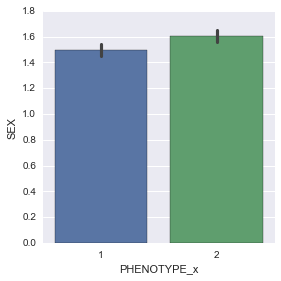

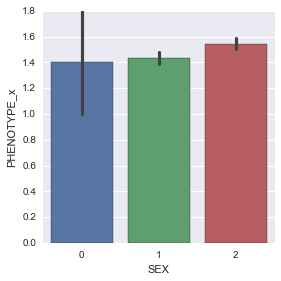

In [7]:
merged[['IID','SEX','PHENOTYPE_x']]
print merged.groupby('PHENOTYPE_x')[['SEX']].count()
sns.factorplot(x='PHENOTYPE_x', y='SEX', kind='bar', data=merged)
sns.factorplot(x='SEX', y='PHENOTYPE_x', kind='bar', data=merged)

In [8]:
merged.loc[(merged['SEX']==0),'PHENOTYPE_x':]

,PHENOTYPE_x,FID,PAT,MAT,SEX,PHENOTYPE_y,rs6685064_A,rs28456011_A,rs10910050_A,rs3935659_G,...,rs7879049_G,rs28615143_A,rs6588830_G,rs4933121_G,rs6644919_G,rs7064310_G,rs7892233_A,rs5982607_A,rs306875_C,rs1973881_G
15,2,29,0,0,0,2,0.0,1,1.0,0,...,0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,2.0,0.0
76,1,98,0,0,0,2,0.0,1,0.0,0,...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
552,2,646,0,0,0,2,0.0,0,0.0,1,...,0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
563,1,657,0,0,0,2,0.0,0,1.0,0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
706,1,831,0,0,0,2,1.0,0,0.0,1,...,0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0


In [9]:
ndf= merged.loc[(merged['SEX']!=0),'IID':]
ndf.head()

,IID,PHENOTYPE_x,FID,PAT,MAT,SEX,PHENOTYPE_y,rs6685064_A,rs28456011_A,rs10910050_A,...,rs7879049_G,rs28615143_A,rs6588830_G,rs4933121_G,rs6644919_G,rs7064310_G,rs7892233_A,rs5982607_A,rs306875_C,rs1973881_G
0,PT1244,2,10,0,0,1,2,0.0,0,0.0,...,0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,E09861,1,12,0,0,2,2,0.0,0,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,H13056_12,1,14,0,0,1,2,0.0,0,1.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,E09984,2,15,0,0,2,2,1.0,0,1.0,...,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,E09800,1,16,0,0,2,2,0.0,0,0.0,...,0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0


### Recode Phenotype labels

In [10]:
df2=ndf[['IID', 'PHENOTYPE_x']]
oldNewmap= {1:0,2:1}
dum_phen = df2['PHENOTYPE_x'].map(oldNewmap)
dum_df = pd.DataFrame({'IID':ndf['IID'],
                      'Phenotype': dum_phen})
dum_df.head()
updatedDataFrame = pd.merge (dum_df, ndf, how='inner', on='IID')
updatedDataFrame.head()

,IID,Phenotype,PHENOTYPE_x,FID,PAT,MAT,SEX,PHENOTYPE_y,rs6685064_A,rs28456011_A,...,rs7879049_G,rs28615143_A,rs6588830_G,rs4933121_G,rs6644919_G,rs7064310_G,rs7892233_A,rs5982607_A,rs306875_C,rs1973881_G
0,PT1244,1,2,10,0,0,1,2,0.0,0,...,0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,E09861,0,1,12,0,0,2,2,0.0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,H13056_12,0,1,14,0,0,1,2,0.0,0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,E09984,1,2,15,0,0,2,2,1.0,0,...,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,E09800,0,1,16,0,0,2,2,0.0,0,...,0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0


In [11]:
ndf.fillna(value='0')
ndf.head()
ndf.columns[7:]
print list(ndf.columns.values)

['IID', 'PHENOTYPE_x', 'FID', 'PAT', 'MAT', 'SEX', 'PHENOTYPE_y', 'rs6685064_A', 'rs28456011_A', 'rs10910050_A', 'rs3935659_G', 'rs12731309_A', 'rs7534897_A', 'rs4576609_A', 'rs3795262_C', 'rs3795263_A', 'rs12024847_A', 'rs2821040_G', 'rs947354_A', 'rs12080677_G', 'rs4648527_G', 'rs3765692_G', 'rs1009345_A', 'rs2275819_A', 'rs1175549_C', 'rs12724233_A', 'rs12036953_G', 'rs4654454_G', 'rs11588149_A', 'rs6656223_G', 'rs3128687_C', 'rs6698702_A', 'rs11260657_A', 'rs7521197_G', 'rs2229330_C', 'rs200447_A', 'rs17030707_A', 'rs11120921_A', 'rs9919220_G', 'rs228690_A', 'rs9662290_G', 'rs12565445_G', 'rs6669509_A', 'rs6541017_G', 'rs5017476_G', 'rs2379107_G', 'rs11586485_A', 'rs663364_A', 'rs1280988_G', 'rs4846028_A', 'rs198406_G', 'rs1023252_A', 'rs2639453_A', 'rs1201157_A', 'rs636964_G', 'rs12129750_A', 'rs3000895_A', 'rs4240904_A', 'rs12090628_C', 'rs864728_C', 'exm17491_A', 'rs3845612_A', 'exm18766_A', 'rs12043211_A', 'rs2359908_A', 'rs7519457_G', 'rs12141361_C', 'rs12568821_A', 'rs1316257

In [12]:
from os import system
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Select features
X = updatedDataFrame[['Phenotype','rs6685064_A', 'rs28456011_A', 'rs10910050_A', 'rs3935659_G', 'rs12731309_A', 'rs7534897_A', 'rs4576609_A', 'rs3795262_C', 'rs3795263_A', 'rs12024847_A', 'rs2821040_G', 'rs947354_A', 'rs12080677_G', 'rs4648527_G', 'rs3765692_G', 'rs1009345_A', 'rs2275819_A', 'rs1175549_C', 'rs12724233_A', 'rs12036953_G', 'rs4654454_G', 'rs11588149_A', 'rs6656223_G', 'rs3128687_C', 'rs6698702_A', 'rs11260657_A', 'rs7521197_G', 'rs2229330_C', 'rs200447_A', 'rs17030707_A', 'rs11120921_A', 'rs9919220_G', 'rs228690_A', 'rs9662290_G', 'rs12565445_G', 'rs6669509_A', 'rs6541017_G', 'rs5017476_G', 'rs2379107_G', 'rs11586485_A', 'rs663364_A', 'rs1280988_G', 'rs4846028_A', 'rs198406_G', 'rs1023252_A', 'rs2639453_A', 'rs1201157_A', 'rs636964_G', 'rs12129750_A', 'rs3000895_A', 'rs4240904_A', 'rs12090628_C', 'rs864728_C', 'exm17491_A', 'rs3845612_A', 'exm18766_A', 'rs12043211_A', 'rs2359908_A', 'rs7519457_G', 'rs12141361_C', 'rs12568821_A', 'rs1316257_A', 'rs6681053_G', 'rs10803352_G', 'rs10489962_G', 'rs10803410_A', 'rs2977290_A', 'rs10127662_C', 'rs1635561_A', 'rs10458538_G', 'rs16830671_A', 'rs2355729_G', 'rs9730142_A', 'rs11261027_A', 'rs2745322_C', 'rs11261075_A', 'rs4920550_A', 'rs4920564_C', 'rs3935824_G', 'rs7545211_A', 'rs2281748_A', 'rs12123337_G', 'rs11677_A', 'rs3736360_A', 'rs8179370_A', 'rs12128312_A', 'rs4655134_C', 'rs6700245_G', 'rs6659209_A', 'rs4281320_C', 'rs11581746_G', 'rs7726_A', 'rs12146138_G', 'rs2871807_G', 'rs157198_G', 'rs12401971_A', 'rs12035644_A', 'rs271392_A', 'rs749665_G', 'rs10798913_G', 'rs370325_A', 'rs10799084_A', 'rs6425730_A', 'rs12126851_A', 'rs17511157_A', 'rs10737365_C', 'rs6425830_G', 'rs524787_A', 'rs12058145_A', 'rs9286948_A', 'rs10159305_G', 'rs4652992_C', 'rs1414472_A', 'rs17500033_A', 'rs2142534_A', 'rs4653107_A', 'rs11264172_A', 'rs10908403_A', 'rs13375070_G', 'rs12074848_G', 'rs4653160_G', 'rs1416840_G', 'rs4653233_A', 'rs4653247_A', 'rs765807_G', 'rs12139812_A', 'rs215864_C', 'exm2265002_A', 'rs10908368_A', 'rs7549842_G', 'rs6662282_A', 'rs11208403_G', 'rs745526_A', 'rs6702480_A', 'rs12748758_A', 'rs16825062_A', 'rs1001400_G', 'rs6677621_A', 'rs17357593_A', 'rs2786480_A', 'rs12407004_A', 'rs1877477_G', 'rs1002701_G', 'rs6699067_A', 'rs11582493_A', 'rs11211073_A', 'rs12094184_A', 'rs1052610_G', 'rs986034_C', 'rs2798353_G', 'rs12123884_G', 'rs12409657_A', 'rs11205506_G', 'rs10493134_G', 'rs4926745_A', 'rs320025_A', 'rs4457622_A', 'rs1320594_A', 'rs11206315_A', 'rs4927084_G', 'rs12137621_A', 'rs2149037_A', 'rs880386_A', 'rs1418442_G', 'rs12085435_A', 'rs17451521_A', 'rs10489468_A', 'rs11207036_G', 'rs1341322_A', 'rs7531119_A', 'rs3126019_G', 'rs12125562_G', 'rs6688878_G', 'rs12404972_C', 'rs849469_G', 'rs12121124_A', 'rs10889118_A', 'rs6679571_A', 'rs17478612_C', 'rs17119433_A', 'rs12562305_A', 'rs17121177_G', 'rs12142294_A', 'rs6687792_G', 'rs7530003_A', 'rs12749061_A', 'rs11582138_G', 'rs12123368_A', 'rs2819130_G', 'rs11580998_A', 'rs11208446_A', 'rs6588094_A', 'rs10493363_G', 'rs10889505_G', 'rs12135213_G', 'rs12120145_G', 'rs12037394_G', 'rs2772294_A', 'rs4926355_C', 'rs17130694_A', 'rs10889779_A', 'rs12563277_G', 'rs12037989_A', 'rs9988559_A', 'rs6669186_A', 'rs315025_A', 'rs12354033_A', 'rs720887_C', 'rs7416326_A', 'rs2797654_A', 'rs6692988_C', 'rs12120655_A', 'rs11576922_A', 'rs11803328_A', 'rs11586072_A', 'rs526674_A', 'rs9729825_G', 'rs3790907_G', 'rs12123603_A', 'rs1281595_C', 'rs17498581_A', 'rs35835790_A', 'rs17114809_C', 'rs11161548_A', 'rs593728_G', 'rs184339_A', 'rs12082787_A', 'rs2791516_G', 'rs17436482_G', 'rs10923099_G', 'rs6672564_A', 'rs7531015_C', 'rs346932_A', 'rs17131515_A', 'rs11582136_G', 'rs2770186_A', 'rs10747493_G', 'rs6662618_A', 'rs17371561_C', 'rs10493864_G', 'rs12043007_A', 'rs6688632_G', 'rs581825_G', 'rs17396000_A', 'rs1778214_A', 'rs17114028_A', 'rs7538619_G', 'rs499009_A', 'rs4495745_A', 'rs17119481_C', 'rs844330_C', 'rs12094588_A', 'rs3753492_G', 'rs3176878_A', 'rs4341378_G', 'rs3737577_A', 'rs11185393_C', 'exm2268922_G', 'rs4462177_C', 'rs6679376_G', 'rs3818562_A', 'rs483096_A', 'rs484673_A', 'rs433192_A', 'rs697387_A', 'rs2271885_C', 'rs1389722_A', 'rs3790715_G', 'rs3806446_G', 'rs17027880_A', 'rs10489796_G', 'rs2492497_G', 'rs924778_A', 'rs7527134_A', 'rs2251405_G', 'rs176662_A', 'rs12562994_G', 'rs7534855_A', 'rs10923142_A', 'rs7540389_A', 'rs2797208_A', 'rs4839496_C', 'rs2478766_C', 'rs12735195_A', 'rs4347199_G', 'rs2274616_A', 'rs577935_A', 'rs267733_G', 'rs11807526_C', 'exm97407_G', 'rs4845792_A', 'rs17667856_A', 'rs12122588_G', 'exm102219_G', 'rs6427671_A', 'rs12097583_G', 'rs4434872_A', 'rs6690242_G', 'rs12758402_A', 'rs6688376_A', 'rs6668261_A', 'rs6666910_G', 'rs1925034_G', 'rs384414_G', 'rs366316_G', 'rs411089_A', 'rs862991_G', 'rs2794502_A', 'exm115309_A', 'rs2295612_A', 'rs4656942_A', 'rs7522269_A', 'rs10919539_G', 'rs12116455_G', 'rs1507746_A', 'rs4657277_C', 'rs1934497_A', 'rs12239576_G', 'rs12027802_A', 'rs11806933_G', 'rs10753643_C', 'rs868376_A', 'rs6426871_G', 'rs16834635_G', 'rs10918239_G', 'rs12048648_A', 'rs10918609_A', 'rs7541843_A', 'rs17344586_A', 'rs2860662_A', 'rs10489192_G', 'rs8623_A', 'rs12097383_A', 'rs12564969_A', 'rs12032929_C', 'rs17345907_C', 'rs1112882_A', 'rs7554931_G', 'rs7552922_C', 'rs17615321_A', 'rs12038255_A', 'rs17552579_G', 'rs16863955_G', 'rs12127476_G', 'rs6691655_G', 'rs12066143_A', 'rs10489473_C', 'exm2268788_C', 'rs12733741_A', 'rs7521346_A', 'rs867541_A', 'rs12137038_A', 'rs12740455_G', 'rs10798715_G', 'rs4652469_G', 'rs7542624_G', 'rs99174_A', 'rs3806302_A', 'rs16857131_G', 'rs4578180_A', 'rs11585935_C', 'rs6424914_A', 'rs10797917_A', 'rs10911457_A', 'rs3010040_A', 'rs1926868_A', 'rs12089250_A', 'rs4288563_A', 'rs8972_G', 'rs10489409_G', 'rs12569046_A', 'rs17524475_A', 'rs10494610_G', 'rs535553_G', 'rs583439_A', 'rs10921206_G', 'rs6680840_G', 'rs12067383_G', 'rs6428224_A', 'rs12755016_C', 'rs11803658_A', 'rs1160224_G', 'rs6682225_A', 'rs10737671_A', 'rs17552989_A', 'rs12127588_A', 'rs12066715_A', 'rs16845628_A', 'rs831750_G', 'exm136890_A', 'rs1578531_A', 'rs4915517_A', 'rs4606345_C', 'rs4359077_A', 'exm138358_A', 'rs12123037_A', 'rs2250509_A', 'rs4950932_G', 'rs12406229_A', 'rs2810615_A', 'rs940652_G', 'exm140589_G', 'rs16853237_G', 'rs955323_G', 'rs2997505_A', 'rs12122704_C', 'rs6692041_A', 'rs11589772_G', 'rs28602403_G', 'rs3024505_A', 'rs11586424_G', 'rs4844564_A', 'rs11799614_A', 'rs2842704_G', 'rs17009223_A', 'rs6702300_A', 'rs17012489_A', 'rs701618_G', 'rs17012564_G', 'rs6680293_G', 'rs11119172_A', 'rs11119275_A', 'rs11119306_A', 'rs2046850_A', 'rs11812030_G', 'rs2501907_G', 'rs4951508_A', 'rs11120142_G', 'rs11120205_C', 'rs6698217_C', 'rs12144357_A', 'rs12385729_A', 'rs7414883_A', 'rs2257059_A', 'rs10864200_G', 'rs17669622_A', 'rs1898312_A', 'rs12758898_A', 'rs6703333_C', 'rs2815251_A', 'rs11117887_G', 'rs1397178_A', 'rs2046842_A', 'rs12033297_A', 'rs11118120_C', 'rs6683441_G', 'rs12136173_G', 'rs13376168_G', 'rs4585986_A', 'rs17011714_C', 'rs34715037_G', 'rs2241096_A', 'rs17161975_G', 'rs16842321_G', 'rs10916543_G', 'rs11579964_A', 'rs17571353_G', 'rs1892122_G', 'rs4459070_A', 'rs12029847_A', 'rs6661550_G', 'rs546206_A', 'rs670054_A', 'rs901668_A', 'rs853022_G', 'rs12027189_A', 'rs4409638_G', 'rs6702011_G', 'rs12044355_C', 'rs11590192_G', 'rs821589_A', 'rs6605044_A', 'rs16858453_A', 'rs3766491_A', 'rs16858662_G', 'rs12402073_G', 'rs6424203_A', 'rs1083873_G', 'rs6667430_A', 'rs487890_G', 'rs568614_G', 'rs12073170_G', 'rs875268_G', 'rs744487_C', 'rs1753579_G', 'rs6586430_A', 'rs11588513_G', 'rs10926189_A', 'rs10926264_A', 'rs10927083_A', 'rs6662005_A', 'rs11577428_G', 'rs4659682_A', 'rs6703352_A', 'rs1765887_A', 'rs10925349_A', 'rs10925387_A', 'rs2779394_A', 'rs1464459_A', 'rs9658992_A', 'rs6690847_C', 'rs526612_A', 'rs11805939_A', 'rs6661899_A', 'rs1418049_G', 'rs12145060_A', 'rs16848431_A', 'rs785544_A', 'rs6429246_C', 'rs1879744_C', 'rs10802951_A', 'rs1578488_G', 'rs2050515_G', 'rs1047840_A', 'rs10803002_G', 'rs3844252_A', 'rs2800757_C', 'rs10803066_G', 'rs472276_G', 'rs2819017_A', 'rs9730373_G', 'rs12141949_A', 'rs1093962_G', 'rs9919234_C', 'rs2817510_G', 'rs9660719_A', 'rs4654164_A', 'rs10802412_A', 'rs10924848_A', 'rs12116484_G', 'rs10399672_A', 'rs7529058_G', 'rs10925013_G', 'rs1105488_A', 'rs3862182_G', 'exm166623_G', 'rs4244185_A', 'rs6587475_G', 'rs12239259_A', 'rs13411762_A', 'rs4488692_G', 'rs17039313_G', 'rs17039339_A', 'rs7588195_A', 'rs12472632_G', 'rs10495516_A', 'rs357977_A', 'rs10200015_A', 'rs754013_G', 'rs7556893_G', 'rs2577202_A', 'rs11683373_G', 'rs17619675_A', 'rs12712004_A', 'rs6740049_A', 'rs2722572_A', 'rs1594102_G', 'rs11888581_G', 'rs2305258_A', 'rs16865717_A', 'rs1797557_G', 'rs771313_A', 'rs12623068_A', 'rs11682611_A', 'rs798440_A', 'rs7601867_G', 'rs3111422_A', 'rs453322_A', 'rs2655455_A', 'rs3856442_G', 'rs16866817_G', 'rs4669365_A', 'rs951629_A', 'rs4669407_A', 'rs2357258_C', 'rs10929604_A', 'rs10929654_A', 'rs1405948_A', 'rs4668690_A', 'rs4669621_G', 'rs1734389_G', 'rs4143555_G', 'rs6737910_A', 'rs4669724_G', 'rs4669727_A', 'rs4233899_G', 'rs10205430_A', 'rs4669845_A', 'rs1401702_G', 'rs559703_A', 'rs12995842_G', 'rs7580932_G', 'rs10176960_G', 'rs2340759_A', 'rs6531102_A', 'rs6743717_A', 'rs16982572_A', 'rs7557152_A', 'rs883144_C', 'rs1515968_C', 'rs7608319_A', 'rs13000922_A', 'rs7564073_C', 'rs851408_A', 'rs10182964_A', 'rs4621133_A', 'rs13010075_G', 'rs342138_G', 'rs11678116_C', 'rs16987985_A', 'rs7598775_A', 'rs4493295_G', 'rs6743484_A', 'rs7569443_A', 'rs2339564_A', 'rs1653769_G', 'rs17763463_G', 'rs10199334_G', 'rs13036246_G', 'rs35324955_A', 'rs7563543_A', 'rs11883596_G', 'exm180737_A', 'rs8179219_A', 'rs12104449_G', 'rs10186544_A', 'rs13395604_G', 'rs12467414_A', 'rs13029005_A', 'exm182784_A', 'rs7590571_G', 'rs4581855_A', 'rs11127248_C', 'rs6723731_G', 'rs4952107_A', 'rs7604316_A', 'rs829608_A', 'rs509380_C', 'rs7566361_A', 'rs3769598_G', 'rs604788_A', 'rs13388421_A', 'rs12621616_A', 'rs1519918_G', 'rs17329797_A', 'rs6711702_C', 'rs12989336_G', 'rs1012668_G', 'rs2098386_G', 'rs17021274_A', 'rs6727303_G', 'rs6746569_G', 'rs17030342_A', 'rs7587206_A', 'rs11897432_A', 'rs1036150_G', 'rs6711405_A', 'rs343945_C', 'rs4952732_C', 'rs12993810_G', 'rs1517025_G', 'rs7573076_G', 'rs3738901_G', 'rs6742625_A', 'rs6742737_A', 'rs2121698_A', 'rs2121697_C', 'rs7562332_A', 'rs7579208_A', 'rs1867822_A', 'rs17035808_A', 'rs3087857_A', 'rs7581528_A', 'rs815816_G', 'rs6744097_G', 'rs2705775_A', 'rs17326321_A', 'rs7586095_C', 'rs7578198_C', 'rs12713138_A', 'rs6545277_G', 'rs12469661_G', 'rs195592_G', 'rs7604061_A', 'rs1011275_C', 'rs1215153_G', 'rs7565034_A', 'rs7560775_A', 'rs6721972_G', 'rs13418952_C', 'rs13423780_G', 'rs10188840_G', 'rs11903838_A', 'rs17269091_G', 'rs17049738_C', 'rs1861108_A', 'rs6740378_A', 'rs17050389_A', 'rs10187463_A', 'rs917929_A', 'rs1534647_A', 'rs6714411_G', 'rs13008221_A', 'rs9309360_A', 'rs10496116_C', 'rs6760401_A', 'rs9678117_A', 'rs2048262_A', 'rs6546110_G', 'rs2723090_A', 'rs10193337_C', 'rs268134_A', 'rs6710236_G', 'rs6710341_G', 'rs17032597_A', 'rs17033632_C', 'rs881645_A', 'rs17551494_C', 'rs4671873_A', 'rs17528215_A', 'rs4854516_G', 'rs11683509_C', 'rs10182789_C', 'rs6759804_A', 'rs9309438_A', 'rs2266917_G', 'rs17664561_G', 'rs4309600_G', 'rs7598653_A', 'rs10192575_A', 'rs11687017_A', 'rs7565433_A', 'rs1430349_G', 'rs951409_A', 'rs4852324_G', 'rs13404452_G', 'exm203494_A', 'rs6738709_A', 'rs17009774_A', 'rs34242711_A', 'rs17010840_A', 'rs1075054_C', 'rs1568378_A', 'rs12052760_A', 'rs6547205_A', 'rs1516255_A', 'rs6716040_G', 'rs1666768_G', 'rs283838_A', 'rs13004360_G', 'rs1448213_C', 'rs283851_A', 'rs12622013_G', 'rs13429593_A', 'rs17018376_G', 'rs7581633_C', 'rs6547526_G', 'rs11691660_C', 'rs6758778_A', 'rs719023_A', 'rs6749685_A', 'rs7599548_G', 'rs11164114_A', 'rs12612424_A', 'rs4629180_G', 'rs6745920_A', 'rs12999517_G', 'rs13018263_G', 'rs2570501_A', 'rs12987646_A', 'rs17687727_A', 'rs4374396_G', 'rs2376740_A', 'rs12475901_A', 'rs1375005_A', 'rs17663778_C', 'rs6542747_A', 'rs7590599_A', 'rs1154652_G', 'rs10171109_G', 'rs1399665_A', 'rs4849086_G', 'rs10864910_A', 'rs3791743_A', 'rs6754886_C', 'rs12999482_A', 'rs17044073_G', 'rs10205198_A', 'rs4849560_C', 'rs11675138_A', 'rs13426749_G', 'rs11694004_A', 'rs972143_A', 'rs838065_G', 'rs13015640_G', 'rs13384487_A', 'rs11890342_A', 'rs9653393_A', 'rs2713207_A', 'rs6760235_G', 'rs7562021_G', 'rs13428951_A', 'rs17008278_A', 'rs1962159_G', 'rs4848836_A', 'rs11684957_A', 'rs729446_C', 'rs10210965_G', 'rs17599575_A', 'rs335130_A', 'rs3816127_C', 'rs841080_A', 'rs3843310_G', 'rs2464792_A', 'rs4662666_G', 'exm227674_G', 'rs12466662_G', 'rs918958_G', 'rs4954106_A', 'rs1879019_G', 'rs4954112_C', 'rs3791322_A', 'rs2290483_G', 'rs1849873_A', 'rs16838223_G', 'rs11688662_G', 'rs6749316_A', 'rs10496773_G', 'rs6756311_G', 'rs13033503_A', 'rs4130252_G', 'rs2380885_A', 'rs12613827_A', 'rs10928131_G', 'rs4662198_A', 'rs1868078_G', 'rs787152_A', 'rs10928205_G', 'rs16855324_A', 'rs12327962_A', 'rs1035822_A', 'rs1469346_A', 'rs2162571_G', 'rs4524072_A', 'rs17347516_C', 'rs331112_A', 'rs17349216_G', 'rs16829500_A', 'rs4664058_A', 'rs1921768_G', 'rs1344655_A', 'rs13393190_A', 'rs249694_A', 'rs1896831_A', 'rs1445657_A', 'rs6748811_C', 'rs4664800_A', 'rs4664804_G', 'rs2123992_A', 'rs1521861_A', 'rs1719079_G', 'rs10167864_A', 'rs10196882_A', 'rs12997772_A', 'rs12998587_A', 'rs1861975_C', 'rs13014943_G', 'rs6723985_A', 'rs13022308_A', 'exm239077_A', 'rs1523879_G', 'rs4667972_C', 'rs7576460_A', 'rs6433033_A', 'rs7562413_A', 'rs4668061_A', 'rs977171_A', 'rs16855872_G', 'rs2433680_A', 'rs2058996_A', 'rs6433102_G', 'rs2241339_A', 'rs2892802_A', 'rs17578787_C', 'rs1518739_G', 'rs12616969_G', 'rs724529_G', 'rs7606918_G', 'rs4972809_A', 'rs13012170_A', 'rs836628_A', 'rs12622834_G', 'rs1451452_A', 'rs9989778_G', 'rs3769254_A', 'rs4972394_G', 'rs10497399_A', 'rs4972590_G', 'rs6731912_G', 'rs4972412_A', 'rs11675772_A', 'rs6716552_A', 'rs6721460_A', 'rs10497417_A', 'rs7600040_C', 'rs7579789_C', 'rs13419894_G', 'rs7609112_A', 'rs17341803_A', 'rs1448520_G', 'rs17345806_G', 'rs868179_A', 'rs2362870_C', 'rs1881697_A', 'rs17683237_A', 'rs6755503_G', 'rs1435571_A', 'exm244578_A', 'rs12478837_A', 'rs7595571_A', 'exm244795_A', 'rs6723526_G', 'rs992334_G', 'rs10180505_G', 'rs17198592_A', 'rs16867365_A', 'rs2035207_A', 'rs16867428_G', 'rs2305586_G', 'rs16867461_A', 'rs12617685_G', 'rs7420169_A', 'rs2840148_G', 'rs10451546_G', 'rs1515894_A', 'rs13398100_A', 'rs16824240_G', 'rs4233772_G', 'rs2034055_A', 'exm251236_A', 'rs17230036_G', 'rs7574377_G', 'rs17333634_G', 'rs10203300_G', 'rs10198982_G', 'rs7419983_A', 'rs3828267_G', 'rs785247_A', 'rs1108939_A', 'rs887695_A', 'rs17748089_A', 'rs9653314_A', 'rs4483984_A', 'rs6708269_G', 'exm2269195_A', 'rs4630705_A', 'rs17431448_G', 'rs4419188_G', 'rs13383716_G', 'rs17302390_G', 'rs17375180_A', 'rs2305566_A', 'rs13402395_G', 'rs2697246_A', 'rs34608683_G', 'rs1456556_A', 'rs10178814_A', 'rs4998599_C', 'rs10931819_C', 'rs4674353_A', 'rs6725131_G', 'rs1123917_A', 'rs4673221_G', 'rs10172421_A', 'rs1355342_G', 'rs985164_G', 'rs11884476_C', 'rs3771044_G', 'rs6748524_G', 'rs13384308_G', 'rs13429746_A', 'rs4675571_G', 'rs2253368_G', 'rs2072570_G', 'rs10190156_A', 'rs6745925_G', 'rs6435568_A', 'rs7893_A', 'rs13010668_C', 'rs16845473_A', 'rs6707202_G', 'rs13028369_A', 'rs10932459_G', 'rs4673725_G', 'rs2055867_G', 'rs7425093_A', 'rs1878607_G', 'rs7589782_A', 'rs4674113_G', 'rs10932682_A', 'rs10514638_G', 'rs1364641_A', 'rs3828280_G', 'rs10932738_A', 'exm266552_A', 'rs2305052_A', 'rs6745199_G', 'rs17288469_A', 'rs16861659_A', 'rs1517459_A', 'rs17339993_G', 'rs10498101_G', 'rs17374455_G', 'rs1519486_C', 'rs7588270_G', 'rs12328631_C', 'rs1439930_G', 'rs1392841_A', 'rs2396384_G', 'rs1962277_G', 'rs13429913_A', 'rs6741679_A', 'rs13405511_A', 'rs13409615_A', 'rs10188715_G', 'rs13389321_G', 'rs10193281_A', 'rs17581255_C', 'rs17273810_A', 'rs17275036_A', 'rs6735285_A', 'rs3111779_A', 'rs13398605_A', 'rs11686658_A', 'rs4973377_A', 'rs7594399_A', 'rs12616972_G', 'rs17297626_A', 'rs3811588_A', 'rs7580869_A', 'exm276857_A', 'rs759173_A', 'rs4430949_G', 'rs7603146_A', 'rs28948673_A', 'rs6723922_G', 'rs1714950_G', 'rs4663146_A', 'rs6731361_A', 'rs13390788_G', 'rs4663164_C', 'rs10106770_G', 'rs4505466_A', 'rs12692160_A', 'rs4536605_G', 'rs11693123_C', 'rs3754669_A', 'rs6431421_G', 'rs7581196_A', 'rs10206697_G', 'rs2600733_G', 'rs999031_C', 'rs10169105_G', 'rs10172321_A', 'rs11690358_G', 'rs11542159_G', 'rs4663262_A', 'rs10185142_A', 'rs6728391_G', 'rs7586445_G', 'rs12467628_A', 'rs12986801_G', 'rs17440466_G', 'rs7593101_A', 'rs6757876_G', 'rs10933562_A', 'rs7629216_A', 'rs12106966_A', 'rs11128726_A', 'rs1878627_A', 'rs6763978_G', 'rs2729287_A', 'rs1178536_G', 'rs17023766_A', 'rs7617493_G', 'rs7625369_A', 'rs4685597_A', 'rs7647903_A', 'rs711616_A', 'rs11129466_A', 'rs6768756_A', 'rs2060642_G', 'rs17361688_A', 'rs6784152_A', 'rs304003_G', 'rs17041401_G', 'rs3805025_G', 'rs3805035_A', 'rs11918262_A', 'rs9833854_A', 'rs11914737_A', 'rs17043484_A', 'rs2730313_C', 'rs6799932_C', 'rs9839456_A', 'rs156168_A', 'rs156164_A', 'rs17216007_G', 'rs6797852_G', 'rs1965222_A', 'rs6799462_G', 'rs6795922_A', 'rs715709_A', 'rs6795577_A', 'rs12497498_A', 'rs2072582_A', 'rs237868_C', 'rs1714302_A', 'rs813606_A', 'rs9827505_G', 'rs9839438_A', 'rs1028154_A', 'rs159143_A', 'rs6786239_A', 'rs39670_A', 'rs12485425_G', 'rs9839935_C', 'rs1865395_A', 'rs301554_A', 'rs17035391_G', 'rs6808492_G', 'rs2012023_G', 'rs17833070_G', 'rs7636218_G', 'rs17307846_G', 'rs9834678_G', 'rs2102916_A', 'exm2265563_A', 'rs829186_A', 'rs2164358_G', 'rs2688672_G', 'rs2162616_A', 'rs4101508_G', 'rs997384_G', 'rs11709686_G', 'rs1506048_G', 'rs1021937_C', 'rs4858280_A', 'rs2366681_C', 'rs424695_A', 'rs7626282_C', 'rs11719664_A', 'rs17011536_G', 'rs10510535_A', 'rs7649176_G', 'rs7637788_A', 'rs4314114_A', 'rs17576085_G', 'rs990497_C', 'rs1386884_G', 'rs17020402_G', 'rs4680793_A', 'rs9831444_A', 'rs13072528_A', 'rs17023226_C', 'rs2082224_A', 'rs9843942_A', 'rs2085311_G', 'rs7614865_A', 'rs7649767_A', 'rs4074418_A', 'rs11714011_A', 'rs1992348_G', 'rs1440385_A', 'rs11708693_A', 'rs7617462_G', 'rs7374633_G', 'rs4974028_A', 'rs4498013_G', 'rs9821623_A', 'rs974595_A', 'rs8192472_A', 'rs399582_A', 'rs2007700_G', 'rs6797157_C', 'rs2109409_G', 'rs730004_G', 'rs1982510_C', 'rs1560333_A', 'rs709317_A', 'rs10510774_G', 'rs1461796_A', 'rs9842885_A', 'rs648872_A', 'rs1499886_G', 'rs12715516_G', 'rs1658356_A', 'rs1718459_G', 'rs900876_G', 'rs4681901_G', 'rs6414591_A', 'rs7610781_A', 'rs9849137_A', 'rs11915615_A', 'rs3796193_G', 'rs212017_C', 'rs6787664_G', 'rs970045_G', 'rs11710207_G', 'rs660323_A', 'rs1512018_C', 'rs13316595_G', 'rs17068548_C', 'rs11130928_G', 'rs949553_A', 'rs12108177_G', 'rs696014_A', 'rs704425_A', 'rs2371358_A', 'rs17070862_G', 'rs4605539_A', 'rs12638637_G', 'rs17434189_C', 'rs17361892_G', 'rs6795228_G', 'rs10510951_A', 'rs7612441_A', 'rs17194629_G', 'rs17194986_G', 'rs1610008_C', 'rs902720_A', 'rs17047489_G', 'rs7622452_A', 'rs1397249_G', 'rs9681907_G', 'rs2056467_G', 'rs1300170_A', 'rs17663544_A', 'rs4423732_A', 'rs4234152_G', 'rs17009307_A', 'rs6801310_A', 'rs4676868_A', 'rs6549449_A', 'rs9811139_G', 'rs6786199_A', 'rs9837318_A', 'rs9824246_G', 'rs11719409_G', 'rs7612743_A', 'rs9858596_A', 'rs278405_A', 'rs13072365_A', 'rs9830820_G', 'rs9880437_G', 'rs3913578_G', 'rs4645140_A', 'rs3849508_C', 'rs1146007_C', 'rs1166978_G', 'rs6762489_A', 'rs17388042_G', 'rs9847586_G', 'rs1454094_A', 'rs13088475_G', 'rs1449409_A', 'rs13059866_G', 'rs1512926_G', 'rs13075932_G', 'rs9790140_A', 'rs9872845_G', 'rs4857055_A', 'rs10222570_A', 'exm332468_G', 'rs11920195_A', 'rs2700605_G', 'rs1449311_A', 'rs3732896_A', 'rs16843185_G', 'rs2625289_A', 'rs1828669_A', 'rs2122132_A', 'rs1457835_G', 'rs2166826_C', 'rs13321574_C', 'rs12491237_A', 'rs9855810_G', 'rs2053627_G', 'rs9288817_A', 'rs6437632_A', 'rs13060369_A', 'rs2077909_A', 'rs6437690_A', 'rs7644333_A', 'rs1517605_G', 'rs1881309_G', 'rs1283109_A', 'rs2673647_C', 'rs10933928_A', 'rs16854140_A', 'rs1289744_G', 'rs11716039_G', 'rs2715738_C', 'rs2715713_A', 'rs6799826_G', 'rs921174_G', 'rs9834665_A', 'rs6796976_A', 'rs9845807_A', 'rs16823817_C', 'rs6785900_G', 'rs4831153_A', 'rs2137211_A', 'rs17720543_A', 'rs4635741_A', 'rs6801870_G', 'rs6765745_G', 'rs16829641_A', 'rs6810204_A', 'rs2472662_A', 'exm341042_A', 'rs6438707_G', 'rs4677965_A', 'rs6800093_A', 'rs9861395_G', 'rs9833435_G', 'rs9853814_A', 'rs4234274_C', 'rs3230_G', 'rs12492352_G', 'rs9872883_A', 'rs6765071_A', 'rs9289316_G', 'rs6767119_A', 'rs2670898_G', 'rs16826828_G', 'rs17275526_A', 'rs1381073_G', 'rs9858118_A', 'rs11717545_G', 'exm351352_G', 'rs9877018_A', 'rs9854387_C', 'rs13059279_A', 'rs4533654_C', 'rs7626433_A', 'rs11915399_A', 'rs11710021_A', 'rs10935090_A', 'rs7646298_C', 'rs13083717_A', 'rs36037_A', 'rs11713704_A', 'rs10512944_A', 'rs6807945_G', 'rs1873664_A', 'rs16849578_G', 'rs2350279_G', 'rs4683491_G', 'rs2291042_G', 'rs4683401_G', 'rs12107859_A', 'rs3816690_G', 'rs7624656_G', 'rs6778966_G', 'rs11717285_A', 'rs7624504_A', 'rs12489418_C', 'rs13061355_A', 'rs7613679_A', 'rs11916000_G', 'rs12152544_G', 'rs12233446_A', 'rs4839610_G', 'rs13070587_C', 'rs728053_G', 'rs7615606_C', 'rs4608734_G', 'rs9816131_G', 'rs17349248_G', 'rs2587028_A', 'rs17438440_A', 'rs4318522_A', 'rs16846545_A', 'rs9853486_G', 'rs2319333_A', 'rs7627412_A', 'rs7611797_G', 'rs1492081_A', 'rs1059502_A', 'rs16861588_G', 'rs701755_G', 'rs7618020_A', 'rs17787978_G', 'rs11921628_C', 'rs1350154_A', 'rs11710513_G', 'rs765281_G', 'rs1402008_A', 'rs545144_G', 'rs9875868_A', 'rs6778259_A', 'rs955013_A', 'rs7622713_G', 'rs1525865_G', 'rs2196521_G', 'rs10513474_G', 'rs6790399_A', 'rs6441061_A', 'rs2665390_G', 'rs10513495_G', 'rs9290009_A', 'rs12485327_A', 'rs967422_G', 'rs1495063_A', 'rs10936499_A', 'rs10460872_G', 'rs12696273_C', 'rs16853574_G', 'rs13091938_C', 'rs6806583_G', 'rs4894572_G', 'rs476651_C', 'rs6781921_G', 'rs474225_A', 'rs11925997_G', 'rs247979_C', 'rs4365637_G', 'rs6443331_A', 'rs1156688_G', 'rs6803362_G', 'rs9836057_A', 'rs9861140_A', 'rs6443523_A', 'rs734368_A', 'rs6784538_A', 'rs4855056_A', 'rs13074509_A', 'rs4859121_G', 'rs1402002_A', 'rs2139559_A', 'rs939334_G', 'rs6414508_A', 'rs7433081_A', 'rs4686762_C', 'rs16859737_A', 'rs12639437_G', 'rs4461451_A', 'rs4686733_G', 'rs12637534_G', 'rs822387_G', 'rs7610110_G', 'rs3864108_A', 'rs6791737_G', 'rs12489890_A', 'rs3774268_A', 'rs710468_A', 'rs710469_A', 'rs7637064_G', 'rs9811040_A', 'rs9822360_A', 'rs9815491_A', 'rs10513843_A', 'rs7624774_A', 'rs7624251_G', 'rs1526031_G', 'rs10937430_G', 'rs9813227_A', 'rs11926896_G', 'rs9883559_A', 'rs6444637_A', 'rs2246195_G', 'rs6788164_A', 'rs11926488_G', 'rs6797622_A', 'rs11185547_A', 'rs13078303_A', 'rs539510_A', 'rs570551_G', 'rs7340883_A', 'rs11729777_G', 'exm380434_A', 'rs6599290_A', 'rs6599400_A', 'rs736455_G', 'rs612428_A', 'rs7658462_A', 'rs1810606_A', 'rs17628728_A', 'rs885797_A', 'rs2916422_A', 'rs7675915_A', 'rs4280680_A', 'rs4689968_G', 'rs10937615_G', 'rs7672067_G', 'rs960055_A', 'rs984576_G', 'rs10017549_G', 'rs3934547_C', 'rs4689477_A', 'rs4543114_A', 'rs4689542_A', 'rs2068344_A', 'rs4689050_A', 'rs6446542_A', 'rs1048009_A', 'rs11946683_A', 'rs7657904_G', 'rs2158275_A', 'rs12500841_A', 'rs16841721_G', 'rs6816775_C', 'rs3775889_A', 'rs6858299_A', 'rs17420450_G', 'rs6835872_A', 'rs11727553_A', 'rs224489_A', 'rs4916640_A', 'rs12331250_C', 'rs17301479_G', 'rs6850802_G', 'rs2867020_A', 'rs2673422_A', 'rs512244_G', 'rs9991988_A', 'rs10013514_A', 'rs10805318_A', 'rs1157946_A', 'rs16891785_A', 'rs13123050_A', 'rs2041672_G', 'rs1558198_A', 'rs16893565_G', 'rs16893569_A', 'rs16894543_G', 'rs6856880_C', 'rs16898189_G', 'rs7658418_A', 'rs2629715_A', 'rs9992598_G', 'rs12649113_A', 'rs16870400_G', 'rs6838195_A', 'rs10000092_G', 'rs727633_A', 'rs11728819_A', 'rs4285070_G', 'rs6851006_G', 'rs2323624_G', 'rs11944771_G', 'rs7654229_C', 'rs1963996_A', 'rs358233_A', 'rs13113121_G', 'rs4697390_G', 'rs756516_G', 'rs10517018_A', 'rs13434906_A', 'rs957615_A', 'rs16875458_G', 'rs10025642_A', 'rs6812715_G', 'rs1453815_G', 'rs13130781_G', 'rs6817894_A', 'exm392932_A', 'rs3733543_A', 'rs7667060_A', 'rs1905564_A', 'rs6832303_G', 'rs10939214_G', 'rs6813605_G', 'rs7694314_G', 'rs11936953_A', 'rs10027353_G', 'rs1706226_A', 'rs16991830_A', 'rs12511779_C', 'rs10484210_G', 'rs10031432_A', 'rs12499505_G', 'rs10517472_A', 'rs2163276_G', 'rs2306597_A', 'rs936380_A', 'rs12512351_A', 'rs278981_A', 'rs17513191_A', 'rs4516756_C', 'rs2261167_A', 'rs12331684_A', 'rs2118030_A', 'rs1442870_G', 'rs10021165_G', 'rs10938310_G', 'rs1460613_C', 'rs11725899_G', 'rs1038767_A', 'rs309875_G', 'rs17576196_G', 'rs17476009_G', 'rs7662817_A', 'rs6818178_A', 'rs881743_G', 'rs1391758_A', 'rs3733540_G', 'rs11735550_C', 'rs2412627_A', 'rs1479008_G', 'rs973031_A', 'rs1383028_G', 'rs6830854_G', 'rs11573128_A', 'rs1277273_A', 'rs11573056_A', 'rs10488926_A', 'rs13132470_A', 'rs13102887_C', 'rs1345040_G', 'rs13126470_A', 'rs1395652_G', 'rs1304686_A', 'rs7695675_A', 'rs11932579_A', 'rs12640895_A', 'rs11734638_C', 'rs4510490_A', 'rs17085830_A', 'rs10006892_G', 'rs7679950_A', 'rs10016747_A', 'rs4241669_A', 'rs2588681_A', 'rs1459417_G', 'rs10517980_A', 'rs9647495_A', 'rs17731697_G', 'rs13144587_C', 'rs1375890_A', 'rs6552116_A', 'rs13039_G', 'rs17148650_A', 'rs7680880_G', 'rs3733362_A', 'rs13150933_G', 'rs2282679_C', 'rs6446913_A', 'rs7659874_G', 'rs7691380_A', 'exm407743_A', 'rs1108255_G', 'rs6829573_G', 'rs11947481_A', 'rs11722689_A', 'rs1009141_A', 'rs4591635_G', 'rs10518195_A', 'rs10028215_A', 'rs1922285_G', 'rs9991949_A', 'rs7682733_G', 'rs11934116_A', 'rs13138361_G', 'rs11723025_G', 'rs10488930_G', 'rs4693387_A', 'rs2035910_A', 'rs11929894_A', 'rs1543163_A', 'rs10516684_A', 'rs2135284_G', 'rs7681742_A', 'rs2078049_A', 'rs1161262_G', 'rs340639_A', 'exm411985_T', 'rs13136331_A', 'rs1871744_G', 'rs12510688_G', 'rs17015445_G', 'rs1442138_G', 'rs6842950_G', 'rs1567929_A', 'rs17221444_A', 'rs17018727_C', 'rs11735755_A', 'rs11945770_A', 'rs17023493_A', 'rs9998674_A', 'rs10008641_A', 'rs1351999_A', 'rs17024939_A', 'rs12503593_A', 'rs6848042_G', 'rs1406311_A', 'rs7666347_A', 'rs4699769_G', 'rs13103925_A', 'rs13104901_C', 'rs2645370_A', 'rs17212693_A', 'rs17303520_C', 'rs10516503_C', 'rs2106987_G', 'rs11097839_G', 'rs11726732_G', 'rs9637619_A', 'rs9996656_A', 'rs1425261_G', 'rs10488899_C', 'rs2212966_A', 'rs12502059_A', 'rs10516550_A', 'rs2221145_G', 'rs17567325_A', 'rs7654972_A', 'rs2575625_A', 'rs1648012_G', 'rs6824447_A', 'rs17041448_G', 'rs244036_A', 'rs2723296_G', 'rs13105878_A', 'rs12508492_G', 'rs1859140_A', 'rs10013796_A', 'rs17045462_G', 'rs6819998_A', 'rs313956_A', 'rs1036757_A', 'rs11098314_G', 'rs13108295_G', 'rs10516635_A', 'rs4361453_G', 'rs17861758_A', 'rs10516642_A', 'rs7698598_A', 'rs2135976_A', 'rs9999992_A', 'rs17886348_A', 'rs4834025_A', 'rs7676058_C', 'rs10016783_G', 'rs17240023_G', 'rs11725348_G', 'rs11943818_A', 'rs11734516_A', 'rs17509240_A', 'rs6832145_G', 'rs6840712_G', 'rs17025316_A', 'rs2660733_A', 'rs13119012_G', 'rs2896920_A', 'rs4563542_A', 'rs13117043_G', 'rs2034535_G', 'rs13115339_A', 'rs6811783_G', 'rs1346214_G', 'rs10004565_G', 'rs6535707_A', 'rs4241931_A', 'rs17370238_G', 'rs3733480_A', 'rs7658326_G', 'rs11734545_G', 'rs3851435_G', 'rs978157_G', 'rs3098027_G', 'rs6823281_G', 'exm426493_C', 'rs12499639_G', 'rs2639582_G', 'rs17019992_G', 'rs6842280_A', 'rs17809246_G', 'rs17610019_A', 'rs12498817_G', 'rs11931842_G', 'rs17028407_A', 'rs7664595_A', 'rs11728805_A', 'rs6813566_C', 'rs4596222_A', 'rs6813648_A', 'rs3828478_A', 'rs1388082_A', 'rs6848512_G', 'rs7658967_A', 'rs3796570_A', 'rs6536096_G', 'rs4691372_G', 'rs12504074_A', 'rs1439260_C', 'rs17301015_G', 'rs12512282_G', 'rs17040932_G', 'rs6852854_A', 'rs9991428_A', 'rs182016_G', 'rs10489050_A', 'rs10857349_A', 'rs2012358_G', 'rs1531589_A', 'rs11932242_C', 'rs13113465_A', 'rs6834073_G', 'rs2714807_G', 'rs1995126_G', 'rs1497961_C', 'rs1982582_G', 'rs1593770_A', 'rs6819953_A', 'rs11735275_G', 'rs17650892_A', 'rs17626424_A', 'rs17543834_G', 'rs10866343_G', 'rs4692758_G', 'rs6810718_A', 'rs17055345_C', 'rs2135196_A', 'rs13128039_A', 'rs35033382_A', 'rs4639045_G', 'rs6813832_A', 'rs3922692_G', 'rs12651020_G', 'rs2555645_A', 'rs2251316_A', 'rs12650824_A', 'rs12647292_A', 'rs7661012_G', 'rs10026079_A', 'rs4429679_A', 'rs17061779_A', 'rs17062019_A', 'rs11133116_G', 'rs17062252_A', 'rs7664413_A', 'rs13104461_A', 'rs2583165_C', 'rs10005919_G', 'rs17725302_G', 'rs17064578_G', 'rs2877985_G', 'rs13140743_A', 'rs2126506_G', 'rs17065497_A', 'rs6552356_G', 'rs17821431_G', 'rs2611020_A', 'rs11724099_C', 'rs10520433_G', 'rs9991082_G', 'rs9312259_A', 'rs28627320_A', 'rs17069334_A', 'rs17069404_A', 'rs2446802_G', 'rs2194101_G', 'rs6832395_G', 'rs13435468_A', 'rs12650765_A', 'exm2261674_G', 'rs17828403_A', 'rs1454711_A', 'rs10520469_G', 'rs9996848_A', 'rs17183352_A', 'rs12641677_G', 'rs17071292_A', 'rs17071527_G', 'rs17251860_G', 'rs7661191_G', 'rs6856771_A', 'rs12648007_A', 'rs10520533_G', 'rs17073734_G', 'rs4607268_A', 'rs4292366_A', 'exm2265899_G', 'rs4861584_G', 'rs4862448_A', 'rs4862451_G', 'rs4862466_A', 'rs10866273_A', 'exm436831_C', 'rs4861655_G', 'rs1534146_G', 'rs3733644_G', 'rs7697970_C', 'rs6846710_G', 'rs12640954_G', 'rs6835306_A', 'rs4862774_C', 'rs10018412_A', 'rs6553138_C', 'rs11723187_A', 'rs2292434_G', 'rs690143_A', 'rs2739584_A', 'rs17080259_A', 'rs10005853_A', 'rs341267_G', 'exm440241_A', 'rs7726442_G', 'rs2853690_A', 'rs10075284_A', 'rs13163790_A', 'rs4566837_G', 'rs10475140_A', 'rs225752_A', 'rs6555155_G', 'rs11133974_G', 'rs316998_G', 'rs1215405_A', 'rs16871346_G', 'rs13169861_A', 'rs17727202_G', 'rs11857958_C', 'rs751905_G', 'rs13176907_A', 'rs13181223_A', 'rs32550_G', 'rs35741_C', 'rs302913_G', 'rs457990_G', 'rs154814_A', 'rs824634_G', 'rs429161_A', 'rs7733194_A', 'rs17243407_A', 'rs2658161_G', 'rs6895861_A', 'rs10513010_A', 'rs17254539_A', 'rs268558_A', 'rs41457_G', 'rs41461_A', 'rs17275422_G', 'rs7729241_A', 'rs4702667_A', 'rs7443032_C', 'rs16884244_C', 'rs7718725_A', 'rs10038054_G', 'rs17759853_A', 'rs1470023_A', 'rs860434_G', 'rs16901481_A', 'rs1870329_G', 'rs12659350_G', 'rs17263496_A', 'rs2434605_A', 'rs31934_A', 'rs835136_A', 'rs2133761_A', 'rs10520825_A', 'rs1039443_G', 'rs17540822_A', 'rs153202_A', 'rs2402335_A', 'rs1482344_A', 'rs10079374_A', 'rs1513089_C', 'rs6877651_A', 'rs2972819_G', 'rs2967900_G', 'rs7379403_A', 'rs7730479_A', 'rs12519679_C', 'rs2963652_G', 'rs975072_A', 'rs1494594_G', 'rs10053798_G', 'rs10473822_A', 'rs3846564_G', 'rs10074734_A', 'rs7724797_A', 'rs4867339_C', 'rs493276_A', 'rs12697260_A', 'rs17416314_A', 'rs10059238_A', 'rs10054504_A', 'rs2330882_A', 'rs403457_A', 'rs1841014_A', 'rs11744078_A', 'rs256600_A', 'rs12188767_G', 'rs13164825_G', 'rs17585602_A', 'rs256296_A', 'rs336486_C', 'rs2291702_G', 'rs10043875_A', 'rs2047176_G', 'rs921020_G', 'rs16902947_G', 'rs12515142_G', 'rs2455253_G', 'rs12188287_G', 'rs4869682_A', 'rs16903531_C', 'rs2910721_G', 'rs1895435_C', 'rs3110992_A', 'rs10075011_A', 'rs1024098_G', 'rs11744923_A', 'rs316398_G', 'rs12521835_A', 'rs254480_A', 'rs4543225_A', 'rs154021_G', 'rs35941_A', 'rs10471919_A', 'rs2897758_A', 'rs1396500_A', 'rs10472000_G', 'rs2161139_A', 'rs13357378_G', 'rs7718757_A', 'rs9885152_A', 'rs17781354_A', 'rs992726_G', 'rs7711639_G', 'rs17380508_G', 'rs295580_G', 'rs16893212_A', 'rs153378_C', 'rs16891251_A', 'rs10054295_G', 'rs7721270_G', 'rs11949052_A', 'rs1309580_A', 'rs245525_G', 'rs2115128_G', 'rs33723_G', 'rs42325_G', 'rs2548585_G', 'rs10434544_G', 'rs6868583_A', 'rs12519613_G', 'rs34289_G', 'rs17253996_A', 'rs853808_A', 'rs16897939_G', 'rs12516844_C', 'rs34221525_A', 'rs11575893_A', 'rs9293720_A', 'rs7709845_G', 'rs4569852_G', 'rs12697910_A', 'rs819554_A', 'rs10062885_G', 'rs403031_G', 'rs9986187_A', 'rs10058135_G', 'rs1525783_A', 'rs12055083_A', 'rs6871717_A', 'rs12654150_C', 'rs875543_G', 'rs11739486_G', 'rs6886903_A', 'rs6453259_A', 'rs987951_A', 'rs7708818_A', 'rs10042636_A', 'rs7730738_A', 'rs355438_A', 'rs2173012_A', 'rs12186484_A', 'rs10070879_A', 'rs16876942_G', 'rs16877062_A', 'rs259073_A', 'rs12658005_A', 'rs259035_C', 'rs17212829_G', 'rs17227806_G', 'rs11744977_G', 'rs16901039_A', 'rs1438743_G', 'rs12520006_G', 'rs12659570_C', 'rs1449228_A', 'rs994090_G', 'rs4916678_A', 'rs2303801_A', 'rs11744148_A', 'rs10036746_A', 'rs1988145_A', 'rs26998_A', 'rs469968_A', 'rs293033_A', 'rs10070518_A', 'rs6894872_C', 'rs10054161_G', 'rs10515247_A', 'rs6861666_G', 'rs17087371_A', 'rs17088025_G', 'rs9327919_G', 'rs10515301_A', 'rs17146237_A', 'rs161318_A', 'rs2018064_C', 'rs7715548_C', 'rs7720125_G', 'rs17450801_G', 'rs2283_G', 'rs35551_G', 'rs13359409_G', 'rs2900053_G', 'rs2288397_A', 'rs10515434_A', 'rs3797730_A', 'rs11948283_A', 'rs13189364_A', 'rs17388817_G', 'rs17135999_G', 'rs7711822_A', 'rs4705653_A', 'rs674588_G', 'rs13186125_G', 'rs4921085_G', 'rs26331_A', 'rs26322_A', 'rs12332394_G', 'rs17143339_A', 'rs2416498_G', 'rs7722194_A', 'rs11960097_C', 'rs11744147_A', 'rs12658464_G', 'rs747013_A', 'rs17149748_G', 'rs149473_G', 'rs149509_G', 'rs4836083_G', 'rs10073969_C', 'rs12515525_G', 'rs9327355_G', 'rs1994665_G', 'rs4379190_G', 'rs17673147_A', 'rs10059650_A', 'rs11746085_A', 'rs6893553_A', 'rs2107329_A', 'rs1291602_A', 'rs256869_G', 'rs4358577_A', 'rs1006549_A', 'rs7702415_G', 'rs245117_G', 'rs11738979_A', 'rs7708798_G', 'rs11958414_A', 'rs28419191_A', 'rs1422187_G', 'rs702379_G', 'exm490319_C', 'rs457639_A', 'rs6880007_G', 'rs6865028_A', 'rs17638714_C', 'rs10062025_A', 'rs152439_G', 'rs4986593_G', 'rs7732910_G', 'rs456304_G', 'rs17101605_A', 'rs358093_A', 'rs13157947_A', 'rs4705036_G', 'rs7716144_G', 'rs891992_G', 'rs2400439_A', 'rs9686886_A', 'rs2400642_G', 'rs2289285_A', 'rs12659504_G', 'rs353291_G', 'exm494004_A', 'rs17096125_G', 'rs2240795_A', 'rs891942_A', 'rs7717659_A', 'rs12518395_A', 'rs13188352_G', 'rs2910031_A', 'rs10065813_A', 'rs1863987_G', 'rs10515721_A', 'rs17653560_A', 'rs17117230_G', 'rs267004_A', 'rs1347118_A', 'rs10070224_G', 'rs10057302_A', 'rs7724666_A', 'rs202793_A', 'rs11950065_A', 'rs12188300_A', 'rs11746179_A', 'rs949718_G', 'rs2222123_A', 'rs384943_G', 'rs4367330_C', 'rs6878494_A', 'rs6874049_A', 'rs7356698_C', 'rs6869306_A', 'rs1345605_A', 'rs7701462_C', 'rs17358554_A', 'rs254240_C', 'rs1975525_G', 'rs1799594_A', 'rs10516015_A', 'rs1376158_A', 'rs1432929_G', 'rs7700378_A', 'rs2337020_G', 'rs4976553_G', 'rs11743301_A', 'rs2668054_A', 'rs6898594_G', 'rs255824_G', 'rs10038749_A', 'rs166354_G', 'rs259903_A', 'rs5014394_A', 'rs4077963_A', 'rs4867594_C', 'rs876302_A', 'rs888936_G', 'rs4867609_A', 'rs4242158_A', 'rs10064808_A', 'rs7722148_G', 'rs10039348_A', 'rs6555988_G', 'rs2305896_A', 'rs2431214_A', 'rs2279188_A', 'rs13160587_A', 'rs2964078_A', 'rs11741337_G', 'rs13186454_G', 'rs6891429_G', 'rs2471014_G', 'rs10516130_A', 'rs12515797_A', 'rs266004_C', 'rs2306826_A', 'rs11743574_A', 'rs2973701_C', 'rs2546643_G', 'rs6888802_A', 'rs3797610_C', 'rs7716112_A', 'rs4700720_A', 'rs7707082_G', 'rs10041598_A', 'rs10053999_A', 'rs10479572_G', 'rs11249743_A', 'rs624335_G', 'rs7732666_A', 'rs2281349_G', 'rs12203592_A', 'rs11966212_G', 'rs879243_A', 'rs12190545_A', 'rs1711969_G', 'rs2816226_A', 'rs1157673_A', 'rs17135412_A', 'rs11242815_G', 'rs13206421_A', 'rs9501935_G', 'rs6929344_G', 'rs4959796_A', 'rs9378359_A', 'rs6909042_A', 'rs4960042_A', 'rs6597110_G', 'rs9328293_A', 'rs760612_A', 'rs200215_A', 'rs6937827_A', 'rs2092141_G', 'rs12333117_A', 'rs1475157_G', 'rs6915313_A', 'rs4960173_G', 'rs11969912_A', 'rs763405_A', 'rs11969257_A', 'rs473437_A', 'rs9328434_A', 'rs11756526_A', 'rs2241669_A', 'rs573917_G', 'rs6901566_A', 'rs4276549_G', 'rs4475363_G', 'rs2294736_G', 'rs4713432_A', 'rs9348953_G', 'rs6902916_G', 'rs10485420_A', 'rs219976_A', 'rs219999_A', 'rs17615708_G', 'rs12200432_G', 'rs6914768_A', 'rs7744797_G', 'rs4712047_G', 'rs7745829_G', 'rs1259003_A', 'rs11966818_A', 'rs2299049_G', 'rs7752521_C', 'rs11969250_G', 'rs9464904_A', 'rs9350008_G', 'rs9383211_A', 'rs9367931_A', 'rs9383214_A', 'rs9477367_A', 'rs11756169_G', 'rs980959_A', 'rs11755216_G', 'rs9350145_G', 'rs1202292_G', 'rs520188_G', 'rs2457340_C', 'rs4712586_G', 'rs6937811_A', 'rs16885175_G', 'rs16901634_G', 'rs9460847_A', 'rs508584_A', 'rs707864_G', 'rs1126617_A', 'rs17307478_G', 'rs3805845_A', 'rs5009712_A', 'rs2274089_A', 'rs12194095_A', 'rs4541737_A', 'rs6921711_C', 'rs12191414_C', 'rs1474589_A', 'rs9468474_G', 'rs3749977_A', 'rs17415601_G', 'rs2523995_A', 'rs757260_A', 'rs28743267_C', 'rs28780093_G', 'rs6931763_C', 'rs4713360_G', 'exm529530_G', 'exm529670_G', 'rs9263740_G', 'rs9263794_G', 'rs3132510_G', 'rs6901869_A', 'rs9461680_A', 'rs2256583_G', 'rs9380240_G', 'rs9264904_A', 'rs2523535_G', 'rs9266409_G', 'rs9266773_G', 'rs9380254_G', 'rs2516462_A', 'rs3128982_G', 'rs3131622_C', 'rs3094228_G', 'rs2244546_G', 'rs3763295_G', 'rs3115672_A', 'rs12210887_A', 'rs558702_A', 'rs1150752_G', 'rs169494_A', 'rs2256594_G', 'rs3132971_C', 'rs9268219_C', 'rs498422_C', 'rs3129943_G', 'rs13204672_G', 'rs17533090_A', 'rs7775228_G', 'rs9275333_G', 'rs3892710_A', 'rs9276689_A', 'rs2296329_G', 'rs471942_A', 'rs9461924_A', 'rs2499766_G', 'rs10947479_A', 'rs206937_A', 'rs205279_A', 'rs12215331_G', 'rs1996913_G', 'rs12204265_A', 'rs6457816_G', 'rs9658119_C', 'rs4713944_A', 'rs1555429_G', 'rs9368950_G', 'rs10807170_G', 'rs1894560_A', 'rs7773994_C', 'rs16890175_G', 'rs16890428_G', 'rs4565302_G', 'rs10484854_A', 'rs862427_A', 'rs9462468_G', 'rs9283907_A', 'rs11755763_A', 'rs11754132_G', 'rs302572_A', 'rs1018155_A', 'rs12665356_A', 'rs4711637_A', 'rs428394_G', 'rs4541736_C', 'rs9394723_A', 'rs12203707_A', 'rs10484761_G', 'rs914505_A', 'rs721313_A', 'rs3804279_A', 'rs10456505_G', 'rs3025053_A', 'rs9381256_A', 'rs12207402_A', 'rs6906753_G', 'rs2039541_G', 'rs10498762_A', 'rs16873837_A', 'rs732080_A', 'rs2396578_G', 'rs17364825_G', 'rs12523687_A', 'rs10456593_A', 'rs4711930_G', 'rs2131283_A', 'rs6930610_A', 'rs16880300_G', 'exm555239_A', 'rs11967792_A', 'rs9296711_G', 'rs243781_G', 'rs6939922_A', 'rs2841002_A', 'rs724677_A', 'rs6459185_A', 'rs12524109_C', 'rs2340641_G', 'rs508577_A', 'rs9351578_A', 'exm558986_G', 'rs9363355_G', 'rs7740616_A', 'rs9342631_A', 'rs6937202_G', 'rs2275209_C', 'rs1293044_A', 'rs1631595_G', 'rs651984_G', 'rs9283838_A', 'rs995863_A', 'rs12200732_A', 'rs6907173_A', 'rs11759297_G', 'rs9360588_G', 'rs4235869_A', 'rs9341388_C', 'rs11758798_A', 'rs10943084_A', 'rs1992140_A', 'rs1992141_G', 'rs524762_A', 'rs970547_G', 'rs9360921_C', 'rs17792496_G', 'rs12660098_A', 'rs17272780_A', 'rs2655685_A', 'rs2235880_A', 'rs9341793_A', 'rs346291_A', 'rs9449095_G', 'rs1339377_G', 'rs13197911_G', 'rs13206561_A', 'rs9450234_A', 'rs7760344_A', 'rs589644_C', 'rs12528858_G', 'rs6927294_A', 'rs989625_G', 'rs9444632_A', 'rs10944413_A', 'rs17277859_G', 'rs9362624_A', 'rs441577_G', 'rs9362711_A', 'rs790584_A', 'rs1868834_G', 'rs9353731_A', 'rs1144159_G', 'rs9451576_C', 'rs4598041_A', 'rs10806442_G', 'rs16884411_A', 'rs4296871_A', 'rs369910_G', 'rs9363099_G', 'rs6899560_G', 'rs11156122_G', 'rs595074_A', 'rs17813462_G', 'rs9490542_A', 'rs1494779_A', 'rs9402701_A', 'rs9495745_A', 'rs2749056_A', 'rs9404299_A', 'rs2157527_G', 'rs7745925_G', 'rs479238_A', 'rs472570_G', 'rs12215393_G', 'rs270690_A', 'rs156135_A', 'rs13196925_C', 'rs1269287_C', 'rs9384586_G', 'rs898896_G', 'rs12333016_G', 'rs3763215_G', 'rs3734678_C', 'rs847007_A', 'rs4946852_A', 'rs1887414_G', 'rs1832778_A', 'rs2334321_A', 'rs10214672_G', 'rs9487643_G', 'rs9398296_A', 'rs6909472_A', 'rs7768849_A', 'rs7773293_G', 'rs9320467_A', 'rs352081_A', 'rs503593_A', 'rs2349214_A', 'rs7757785_A', 'exm573624_C', 'rs1165376_G', 'rs9400994_G', 'rs17079069_G', 'rs1771756_A', 'rs4946391_A', 'rs12197250_A', 'rs7742105_G', 'rs13214367_G', 'rs2046446_G', 'rs724469_G', 'rs9401703_A', 'rs1397199_A', 'rs6921885_G', 'rs2626128_A', 'rs2146288_G', 'rs1936797_G', 'rs2326743_G', 'rs9385488_G', 'rs1414738_A', 'rs6905196_G', 'rs2571575_A', 'rs12197456_G', 'rs1932106_C', 'rs6569667_A', 'rs600306_A', 'rs6907728_C', 'rs2294757_A', 'rs9483499_G', 'rs7760570_A', 'rs3777811_G', 'rs9321406_A', 'rs9493858_A', 'rs228420_A', 'rs6569962_A', 'rs12202002_G', 'rs742103_C', 'rs9373124_G', 'rs6930223_C', 'rs2207000_A', 'rs7744517_G', 'rs9494412_A', 'rs13209304_A', 'rs276567_G', 'rs9494674_G', 'rs608914_G', 'rs12203234_A', 'rs6905679_G', 'rs9389586_A', 'rs1188852_G', 'rs1188857_A', 'rs1188873_C', 'rs2498635_A', 'rs9376419_G', 'rs1157002_A', 'rs12183158_A', 'rs1452992_A', 'rs12189801_G', 'rs9403402_A', 'rs6930314_A', 'rs9386162_C', 'rs6905055_G', 'rs1765028_G', 'rs1333712_A', 'rs17592701_G', 'rs4896975_A', 'rs9390556_A', 'rs9390569_G', 'rs6570854_A', 'rs11754224_G', 'rs9390643_A', 'rs10499252_C', 'rs2341551_G', 'rs9480154_A', 'rs4869700_G', 'rs7770982_G', 'rs7760914_A', 'rs9371528_A', 'rs488133_A', 'rs7772542_G', 'rs1408458_A', 'rs959024_G', 'rs4869781_A', 'rs4626436_A', 'rs11156007_A', 'rs7745332_A', 'rs9371382_A', 'rs9480214_A', 'rs10499299_G', 'rs4591861_G', 'rs9384411_C', 'rs9384456_A', 'rs12201190_A', 'rs6934980_G', 'rs4869890_A', 'rs1753196_A', 'rs2803358_A', 'rs1750043_G', 'rs9348250_G', 'rs705936_A', 'rs16889320_G', 'rs4252170_G', 'rs11752957_A', 'rs10945718_A', 'rs17641124_A', 'rs13202365_G', 'rs9365309_A', 'rs10945770_G', 'rs2023053_A', 'rs12202992_G', 'rs9456769_G', 'rs9365409_A', 'rs12661450_C', 'rs2186815_A', 'rs10945881_A', 'rs11759099_A', 'rs9458828_A', 'rs11759436_G', 'rs12205431_A', 'rs206731_A', 'rs733336_A', 'rs12528404_A', 'rs6905430_A', 'rs11752397_A', 'rs9459356_G', 'rs12528988_G', 'rs221746_A', 'rs9364827_A', 'rs4710024_A', 'rs10806847_G', 'rs12524741_G', 'rs4145432_A', 'rs2881194_C', 'rs2981984_G', 'rs9457309_A', 'rs2636353_A', 'rs12530360_G', 'rs1551988_G', 'rs9766768_A', 'rs9379336_A', 'rs7744688_C', 'rs4710696_A', 'rs1022614_A', 'rs28644307_A', 'rs4584046_C', 'rs6970378_G', 'rs35192495_A', 'rs4724821_A', 'rs13171_A', 'exm597537_G', 'rs7807150_A', 'rs28522260_A', 'rs6943934_G', 'rs10952002_G', 'rs12670417_A', 'rs4720940_A', 'rs1010302_A', 'rs11769575_C', 'rs1713911_A', 'rs6957713_A', 'rs6958864_A', 'rs6973046_G', 'rs10951959_A', 'rs12702519_G', 'rs11762330_G', 'rs17168369_A', 'rs17137154_A', 'rs13234855_A', 'rs10252010_A', 'rs1468594_A', 'rs10268598_A', 'rs6463778_G', 'rs10486231_A', 'rs12234501_A', 'rs2189621_A', 'rs10255611_A', 'rs7803616_A', 'rs12536973_G', 'rs17162571_A', 'rs13240249_G', 'rs6965265_A', 'rs7798199_G', 'rs4721111_A', 'rs10488225_A', 'rs12699436_C', 'rs16877717_A', 'rs2884164_G', 'rs4329179_A', 'rs7787319_G', 'rs10243359_G', 'rs1432496_A', 'rs10486048_A', 'rs17168036_C', 'rs10267619_A', 'rs10264038_A', 'rs10237214_G', 'rs17169067_A', 'rs12113594_G', 'rs38182_A', 'rs17169172_A', 'rs12699786_A', 'rs10244202_A', 'rs10280750_A', 'rs2389833_A', 'rs801763_A', 'rs4721854_C', 'rs4721922_G', 'rs1108864_C', 'rs17143912_G', 'exm608468_G', 'rs10256021_G', 'rs17145586_C', 'rs2699460_C', 'rs6961921_G', 'rs7798524_A', 'rs11761760_A', 'rs2023718_A', 'rs7801617_A', 'rs1389653_G', 'rs17369536_G', 'rs16483_G', 'rs10487605_A', 'rs7789043_A', 'rs6461830_A', 'rs17152874_A', 'rs2699818_C', 'rs10240247_A', 'rs11763033_G', 'rs1557995_C', 'rs4722626_C', 'rs17428109_A', 'rs11764401_G', 'rs6978998_A', 'rs10231578_G', 'rs10258887_G', 'rs10268254_G', 'rs6955266_A', 'rs10242171_A', 'rs320101_G', 'rs12701006_A', 'rs10229281_A', 'rs2267727_G', 'rs11762801_A', 'rs1017118_G', 'rs17160152_A', 'rs17160267_A', 'rs10274825_C', 'rs10259038_A', 'rs6947433_A', 'rs17161478_G', 'rs1345517_A', 'rs6961966_G', 'rs4720156_G', 'rs10282356_G', 'rs7800747_A', 'rs13223811_G', 'rs17765842_C', 'rs3815484_A', 'rs10227096_A', 'rs17170608_C', 'rs17170613_G', 'rs6948404_G', 'rs4720230_A', 'rs1882086_C', 'rs17170854_A', 'rs6957997_A', 'rs6980398_A', 'rs7797162_G', 'rs1882072_A', 'rs12701634_G', 'rs4723777_A', 'rs10230144_A', 'rs17619647_A', 'rs11561862_G', 'rs10240222_G', 'rs2302341_A', 'rs17538328_G', 'rs6964864_C', 'rs4723938_C', 'rs1921743_A', 'rs11767956_G', 'rs29888_G', 'rs1859699_A', 'rs417916_A', 'rs12701888_A', 'rs1079866_G', 'rs846312_G', 'rs11769164_A', 'rs799084_A', 'rs2190947_C', 'rs13225071_A', 'rs7805659_A', 'rs7785858_G', 'exm619411_G', 'rs6957855_A', 'rs10278222_G', 'rs6961632_G', 'rs6955221_A', 'rs10249138_A', 'rs6954126_G', 'rs4947699_G', 'rs17815318_A', 'rs17632216_G', 'rs4615525_C', 'rs2252586_A', 'rs11977660_G', 'rs11976696_G', 'rs6956733_A', 'rs6943047_A', 'rs2196183_G', 'rs4718560_A', 'rs6460375_A', 'rs17142110_A', 'rs2530445_A', 'rs2530451_A', 'rs6944468_G', 'rs6958698_A', 'rs11767085_G', 'rs10234983_G', 'rs11768039_C', 'rs2903400_A', 'rs2049475_A', 'rs10261209_A', 'exm2262349_G', 'rs10233395_G', 'rs2267816_A', 'rs10237831_A', 'rs2240478_A', 'rs7804781_A', 'exm628760_A', 'rs7778518_A', 'rs6465722_G', 'rs1524742_G', 'rs12536887_A', 'rs17150542_G', 'rs7810530_G', 'rs763451_A', 'rs2362640_A', 'rs38093_A', 'rs10485909_A', 'rs2886613_A', 'rs304768_G', 'rs10441382_A', 'rs10266458_G', 'rs17275986_G', 'rs7790316_A', 'rs2059037_G', 'rs12673548_G', 'rs701277_A', 'rs515139_A', 'rs781011_C', 'rs6943762_G', 'rs6946119_G', 'rs2158929_A', 'rs2263064_G', 'rs2373395_G', 'rs1208888_A', 'rs38948_A', 'rs10245350_G', 'rs6465305_A', 'rs10236943_G', 'rs10249071_A', 'rs10225965_A', 'rs17164871_A', 'rs17165334_A', 'rs17734766_G', 'rs10215958_G', 'rs41528_A', 'rs1557658_G', 'rs12539995_C', 'rs468_G', 'rs43067_A', 'rs16868799_A', 'rs11983484_A', 'rs6973117_A', 'rs1237992_G', 'rs740209_C', 'rs7783611_G', 'rs17147641_A', 'rs219815_A', 'exm639622_A', 'rs6465819_G', 'rs7786466_G', 'rs2529232_A', 'rs362723_A', 'rs12705150_G', 'rs661492_G', 'rs7804665_G', 'rs17326034_A', 'rs7804399_G', 'rs6971455_A', 'rs993262_A', 'rs10280745_A', 'rs7787604_A', 'rs17345800_G', 'rs2075114_A', 'rs3999821_A', 'exm648546_A', 'rs11977021_A', 'rs17153267_G', 'rs10241552_G', 'rs7799849_A', 'rs2111201_A', 'rs2227272_G', 'rs1464743_A', 'rs2254897_G', 'rs2966420_C', 'rs2106913_A', 'rs4730659_G', 'rs2709501_G', 'rs6466523_A', 'rs6958700_A', 'rs41943_G', 'rs12532763_G', 'rs17535451_G', 'rs11982968_G', 'rs2192300_G', 'rs284345_A', 'rs4288315_A', 'rs13245041_G', 'rs10487263_G', 'rs17132871_A', 'rs7795796_G', 'rs668717_G', 'rs12706739_A', 'rs1204518_C', 'rs11563410_G', 'rs1466146_A', 'rs359664_G', 'exm655610_A', 'rs11769333_C', 'rs7788769_A', 'rs4731706_A', 'rs4076265_A', 'rs1073259_A', 'rs11773898_G', 'rs1593306_C', 'rs17805585_A', 'rs10488419_A', 'rs6944407_A', 'rs6976629_A', 'rs322297_C', 'rs7786318_G', 'rs975965_G', 'rs6947017_G', 'rs2465911_G', 'rs6949890_A', 'rs2256682_A', 'rs6967493_A', 'rs1557973_C', 'rs10258837_C', 'rs10277430_A', 'rs10266594_G', 'rs12703414_A', 'rs11761379_A', 'rs6464466_A', 'rs12537777_A', 'rs9986765_G', 'rs10277938_A', 'rs1525459_A', 'rs17169669_A', 'rs2022225_A', 'rs851727_G', 'rs1922886_A', 'rs10271435_A', 'rs6956460_G', 'rs10254881_G', 'rs6970608_A', 'rs7785602_G', 'rs12674335_G', 'rs1568629_G', 'rs2140144_A', 'rs11772925_A', 'rs12669824_G', 'rs4326309_A', 'rs3918184_A', 'rs3918196_A', 'rs1966602_A', 'rs2792432_G', 'exm673005_C', 'rs2530457_A', 'exm2266492_A', 'rs7805942_C', 'rs9640302_A', 'rs3218536_A', 'rs12539937_G', 'rs4439038_A', 'rs2312322_C', 'rs10246779_G', 'rs6973850_A', 'rs2533617_A', 'rs3115192_G', 'rs7783212_A', 'rs11763741_A', 'rs882466_A', 'rs3734966_G', 'rs12536841_A', 'rs1657307_G', 'rs12666834_A', 'rs10271719_A', 'rs1895092_G', 'rs956406_A', 'rs7785787_G', 'rs7777688_G', 'rs1461208_A', 'rs11761957_A', 'rs1733657_A', 'rs2302149_A', 'rs11770690_A', 'rs12534197_G', 'rs17837745_G', 'rs9768449_A', 'rs6459842_A', 'rs7811473_A', 'rs11995670_G', 'rs3824148_G', 'rs6559181_G', 'rs4735946_G', 'rs12675380_G', 'rs4976875_A', 'rs768753_G', 'rs4876153_G', 'rs7843995_G', 'rs6982025_A', 'rs17078780_A', 'rs10503197_G', 'rs10102960_A', 'rs7839985_A', 'rs7459738_A', 'rs13281285_G', 'rs17066956_A', 'rs17068023_G', 'rs2554510_A', 'rs7816211_G', 'rs1504757_A', 'rs732468_G', 'rs13269869_G', 'rs293872_A', 'rs11136774_A', 'rs7824955_A', 'rs11786333_A', 'rs870585_A', 'rs12682166_A', 'rs2816530_G', 'rs11775757_G', 'rs2515488_C', 'rs2959779_G', 'rs17077658_G', 'rs12549951_G', 'rs13275170_A', 'rs13249564_G', 'rs6601483_A', 'rs2246521_A', 'rs6990313_A', 'rs11784167_G', 'rs4474021_A', 'rs12375378_C', 'rs10109292_G', 'rs17802857_G', 'rs17094556_A', 'rs4629867_G', 'rs17116959_C', 'rs13271261_A', 'rs12675018_G', 'rs6995984_G', 'rs10503519_A', 'rs11992231_G', 'rs268359_G', 'rs17121158_A', 'rs1604375_G', 'rs10090288_C', 'rs10106054_G', 'rs2073695_A', 'exm684433_G', 'rs2588152_A', 'rs437548_G', 'rs2979776_A', 'rs11986482_G', 'rs10100475_C', 'rs2048091_C', 'rs12544391_A', 'rs6980861_A', 'rs4921659_A', 'rs4921662_A', 'rs9987322_G', 'rs4466415_C', 'rs316_A', 'rs7007963_A', 'rs6985910_A', 'rs17092536_G', 'rs9325872_A', 'rs17493272_A', 'rs10089927_G', 'rs7001002_G', 'rs10788703_G', 'rs1383573_G', 'rs4464960_G', 'exm687411_A', 'rs10100426_G', 'rs4871976_G', 'rs2404332_A', 'rs11781095_G', 'rs17088616_A', 'rs2466195_G', 'rs3924519_G', 'exm689331_A', 'rs17089312_A', 'rs2137304_A', 'rs13254021_G', 'rs17052775_A', 'rs13270272_A', 'rs2979823_G', 'rs17790824_G', 'rs4425764_C', 'rs17054141_C', 'rs881366_A', 'rs4871962_G', 'rs17055073_A', 'rs17174717_G', 'rs4732802_A', 'rs11993800_A', 'rs10104739_G', 'rs6996714_A', 'rs7823358_C', 'rs2954794_G', 'rs10454342_A', 'rs11993516_A', 'rs16879099_G', 'rs1685117_A', 'rs11986601_A', 'rs3890448_A', 'rs6985083_G', 'rs7831942_A', 'rs2070493_A', 'rs7341564_A', 'rs6474491_G', 'rs16887465_A', 'rs11785248_G', 'rs4736794_G', 'rs3736646_A', 'rs16889988_A', 'rs11987006_A', 'rs12550040_A', 'rs7843510_G', 'rs6651363_A', 'rs1589825_A', 'rs9298006_G', 'rs1397797_C', 'rs16914775_G', 'rs1351754_A', 'rs12674534_A', 'rs7813671_A', 'rs7002709_A', 'rs7829966_A', 'rs10958403_A', 'rs3889124_G', 'rs2199921_A', 'rs2622596_G', 'rs13258270_G', 'rs1511723_G', 'rs13268762_A', 'rs2317990_A', 'rs12678446_A', 'rs17259642_A', 'rs1463437_C', 'rs12546225_G', 'rs973807_A', 'rs2634519_A', 'rs2693430_G', 'rs9694192_G', 'rs939341_C', 'rs1871217_A', 'rs7015098_G', 'rs6471977_A', 'rs2351950_G', 'rs12114607_A', 'rs17288962_A', 'rs16931371_G', 'rs7817744_A', 'rs6472155_G', 'rs10504382_C', 'rs10808747_A', 'rs900114_A', 'rs6472354_G', 'rs17387279_C', 'rs6996725_A', 'rs7838605_A', 'rs6981344_A', 'rs283327_A', 'rs9298166_A', 'rs7819542_G', 'rs13253114_G', 'rs7005180_A', 'rs16938215_A', 'rs2291220_G', 'rs7009095_C', 'rs9657104_A', 'rs6472855_A', 'rs1433470_A', 'rs2732014_G', 'rs2925155_A', 'rs2977327_A', 'rs16939265_A', 'rs7846606_G', 'rs10504629_A', 'rs2733714_A', 'rs10808814_A', 'rs7462051_A', 'rs17458102_A', 'rs7016810_A', 'rs12676749_A', 'rs10087852_A', 'rs7824133_A', 'rs1404756_A', 'rs10958161_A', 'rs4639509_G', 'rs4265180_A', 'rs4427165_G', 'rs16912559_G', 'rs783508_A', 'rs10504824_A', 'rs3779794_A', 'rs10101821_G', 'rs4375050_A', 'rs16880099_A', 'rs4961099_A', 'rs10087480_A', 'rs11782542_A', 'rs1805860_A', 'rs6471183_G', 'rs7823924_G', 'rs16914707_A', 'rs733330_G', 'rs3133980_A', 'rs7837249_G', 'rs6986659_G', 'rs2515226_A', 'rs2678822_G', 'rs17669960_G', 'rs1020344_A', 'rs4735557_G', 'rs3019294_A', 'rs7821200_A', 'rs10097780_A', 'rs517811_G', 'rs1265139_G', 'rs10505029_G', 'rs6468864_A', 'rs7017690_G', 'rs4734783_G', 'rs17278434_A', 'rs7008088_G', 'rs7826613_G', 'rs7829063_A', 'rs16873927_A', 'rs13282530_A', 'rs2938304_A', 'rs13274462_A', 'rs1450596_G', 'rs7815781_G', 'rs4493937_A', 'rs4332164_A', 'rs869476_A', 'rs2468871_A', 'rs7825278_A', 'rs2737218_G', 'rs13279543_G', 'rs1499430_A', 'rs7834609_G', 'rs4876852_A', 'rs10505338_A', 'rs11776031_G', 'rs17771512_A', 'rs1903512_G', 'rs16892807_G', 'rs4871125_A', 'rs10091004_A', 'rs6994902_A', 'rs13275987_A', 'rs10505421_C', 'rs11994870_G', 'rs4870870_A', 'rs6470248_C', 'rs1443993_C', 'rs4006531_G', 'rs1491477_G', 'rs10505462_G', 'rs9297731_A', 'rs4422744_A', 'rs4871716_G', 'rs10110041_A', 'rs10282975_A', 'rs4130120_G', 'rs4733828_A', 'rs1499368_A', 'rs11784358_A', 'rs13271059_G', 'rs10956535_G', 'rs16904352_G', 'rs263234_G', 'rs4736746_G', 'rs4352831_A', 'rs1878016_A', 'rs2721905_A', 'rs7841637_A', 'rs10283307_G', 'rs7005796_A', 'rs16904909_A', 'rs1075580_G', 'rs2945733_A', 'rs4897689_G', 'rs4401895_A', 'rs16905258_A', 'rs10099533_A', 'rs13282624_A', 'rs17663419_A', 'rs11775756_A', 'rs12549200_A', 'rs2135461_G', 'rs6577977_C', 'rs994769_G', 'rs124672_G', 'rs3935989_G', 'rs1878478_G', 'rs11779803_A', 'rs898987_A', 'rs4976944_A', 'rs9774266_A', 'rs4917239_G', 'rs12546526_A', 'rs13255110_A', 'rs12339394_G', 'rs7028802_A', 'rs10814999_G', 'rs9408671_A', 'rs4742236_A', 'rs16924786_G', 'rs12343006_G', 'rs4741056_A', 'rs10738237_A', 'rs10960412_A', 'rs6474799_A', 'rs7868180_G', 'rs10126007_A', 'rs4741603_A', 'rs7048135_C', 'rs7019385_A', 'rs10963744_G', 'rs4551422_G', 'rs7030343_A', 'rs7847882_C', 'rs7864828_A', 'rs10757185_A', 'rs13283799_G', 'rs17386332_G', 'rs10491702_A', 'rs2093836_A', 'rs17405547_A', 'rs1324208_A', 'rs7036558_A', 'rs1571837_A', 'rs6475728_A', 'rs2376117_A', 'rs4741713_A', 'rs7042212_A', 'rs34881325_A', 'rs10967228_A', 'rs7045124_A', 'rs1470943_A', 'rs7859818_G', 'rs10967515_G', 'rs10812474_G', 'rs10967775_C', 'rs7875874_A', 'rs12236127_A', 'rs12341737_A', 'rs7035633_A', 'rs12351927_A', 'rs10973533_A', 'rs12001442_G', 'rs7029652_G', 'rs10974127_A', 'rs10814808_A', 'rs7850708_A', 'rs10125159_A', 'rs2093322_A', 'rs10739044_A', 'rs10974471_A', 'rs10758611_A', 'rs10511457_A', 'rs954864_A', 'rs10758624_A', 'rs6476874_A', 'rs10974611_A', 'rs10815016_G', 'rs1471786_A', 'rs301453_A', 'rs10815044_A', 'rs301488_A', 'rs301486_A', 'rs296827_A', 'rs10974772_A', 'rs457287_A', 'rs457417_C', 'rs10758661_A', 'rs6476924_C', 'rs10974947_A', 'rs16923101_A', 'rs2295870_C', 'rs10435744_G', 'rs10435814_G', 'rs7028800_C', 'rs7024586_A', 'rs10975190_A', 'rs10815252_A', 'rs10975202_A', 'rs7858030_A', 'rs7849484_A', 'rs7028052_A', 'rs7044017_G', 'rs1418742_G', 'rs7872100_A', 'rs10975463_G', 'rs2066362_A', 'rs2169285_A', 'rs10118449_A', 'rs1929933_G', 'rs7031908_A', 'rs11999442_A', 'rs11998950_A', 'rs10975897_G', 'rs10975955_A', 'rs7019027_A', 'rs913581_A', 'rs2820944_G', 'rs12347615_G', 'rs11792571_C', 'rs10815605_A', 'rs1926410_A', 'rs10976375_G', 'rs10758888_A', 'rs7865284_G', 'rs12002314_G', 'rs10511487_A', 'rs10976702_A', 'rs10976815_A', 'rs17550688_A', 'rs1416592_A', 'rs10976896_A', 'rs1500309_A', 'rs3903826_G', 'rs2890794_A', 'rs7870456_A', 'rs10977207_A', 'rs3802396_G', 'rs6477355_A', 'rs10977313_A', 'rs10815967_A', 'rs723145_A', 'rs17584499_A', 'rs2890841_G', 'rs10511511_A', 'rs13289308_G', 'rs1348641_G', 'rs182719_A', 'rs7034007_A', 'rs10816040_A', 'rs10977567_A', 'rs1157904_C', 'rs928476_A', 'rs10977816_A', 'rs12339036_A', 'rs1332199_A', 'rs664869_A', 'rs10491608_A', 'rs1934268_G', 'rs7873669_C', 'rs10978077_G', 'rs10978083_A', 'rs10491907_C', 'rs6477436_A', 'rs2136530_A', 'rs565315_A', 'rs2475354_A', 'rs16925679_A', 'rs10809062_A', 'rs4595175_C', 'rs4740453_A', 'rs12352981_A', 'rs976831_A', 'rs1853232_A', 'rs7023802_A', 'rs10959310_A', 'rs3858019_G', 'rs954492_A', 'rs4740464_A', 'rs10756267_A', 'rs1564999_A', 'rs10429595_A', 'rs16928298_G', 'rs10960466_A', 'rs13297287_C', 'rs10960540_G', 'rs10960561_A', 'rs10809747_A', 'rs10809748_A', 'rs1331367_G', 'rs1331346_A', 'rs2065367_G', 'rs2022314_A', 'rs10960688_A', 'rs12235745_A', 'rs11787985_A', 'rs1408801_G', 'rs17285931_G', 'rs10448182_A', 'rs10511576_A', 'rs10514822_A', 'rs10961028_A', 'rs7027951_A', 'rs10491754_A', 'rs12336782_A', 'rs10810000_A', 'rs4740554_C', 'rs7030346_A', 'rs16931104_G', 'rs1609801_G', 'rs10961329_A', 'rs16931284_C', 'rs10283831_A', 'rs16931322_A', 'rs12682686_A', 'rs10435726_A', 'rs10810130_A', 'rs877569_G', 'rs4741365_A', 'rs527093_G', 'rs10961558_A', 'rs7047109_G', 'rs12337747_A', 'rs10810242_A', 'rs10961709_A', 'rs7868862_G', 'rs7031476_A', 'rs10961867_C', 'rs4741455_G', 'rs1780159_G', 'rs513270_A', 'rs7864179_G', 'rs10122040_A', 'rs682553_G', 'rs12336509_A', 'rs10810478_A', 'rs1328285_A', 'rs3008694_G', 'rs1328293_A', 'rs7850689_A', 'rs7034935_A', 'rs10511624_G', 'rs406268_A', 'rs10963040_C', 'rs2044119_G', 'rs2197152_A', 'rs2243877_G', 'rs11790958_A', 'rs10810813_A', 'rs10115064_A', 'rs3824388_G', 'rs3808745_A', 'rs2383047_A', 'rs12376522_A', 'rs11791520_A', 'rs5022716_A', 'rs4474113_G', 'rs1329917_A', 'rs2253259_A', 'rs10124717_A', 'rs2791446_A', 'rs1888065_A', 'rs10511659_A', 'rs949682_A', 'rs10963684_A', 'rs776757_C', 'rs10811061_G', 'rs10963919_C', 'rs7865126_G', 'rs2503349_G', 'rs7039309_A', 'rs11790131_A', 'rs12000690_G', 'rs9407950_A', 'rs10964389_G', 'rs6475394_G', 'rs12348353_A', 'rs7871772_G', 'rs4478647_A', 'rs1889245_A', 'rs7046901_G', 'rs10964552_A', 'rs12376200_A', 'rs1888920_A', 'rs10965063_G', 'rs7026552_A', 'rs7865502_A', 'rs3802393_A', 'rs7852128_C', 'rs10757278_G', 'rs10811659_G', 'rs944802_A', 'rs693370_A', 'rs1499558_G', 'rs10757377_A', 'rs7019344_A', 'rs10965577_G', 'rs7869437_A', 'rs1934110_A', 'rs2225964_C', 'rs1929171_C', 'rs17836259_A', 'rs1410844_A', 'rs10733392_G', 'rs1329024_G', 'rs4977892_A', 'rs7850169_A', 'rs4977922_C', 'rs1984582_A', 'rs12341864_G', 'rs2772571_C', 'rs4284108_A', 'rs4145038_G', 'rs10122826_G', 'rs6475824_A', 'rs10966576_A', 'rs10812151_G', 'rs1461331_C', 'rs7857156_A', 'rs7046929_A', 'rs1381148_A', 'rs1332438_A', 'rs1758742_A', 'rs7856650_A', 'rs16909495_A', 'rs7036435_A', 'rs7047552_A', 'rs13301551_A', 'rs10491876_A', 'rs10757596_C', 'rs10812442_A', 'rs7862217_A', 'rs600728_G', 'rs3736819_A', 'rs10217315_G', 'rs1111764_A', 'rs7021452_G', 'exm2259305_G', 'rs10757663_G', 'rs10967952_G', 'rs1977661_A', 'rs3739527_A', 'rs12555345_G', 'rs7858580_A', 'rs17698657_A', 'rs13440274_A', 'rs10812853_C', 'rs321738_A', 'rs702248_A', 'rs1954280_A', 'rs1010587_A', 'rs1929831_G', 'rs10491680_G', 'rs580215_A', 'rs10969287_G', 'rs7048366_A', 'rs12344997_A', 'rs10813168_A', 'rs1414029_G', 'rs7020357_G', 'rs2804505_A', 'rs10969620_A', 'rs17777591_A', 'rs12553076_A', 'rs10970317_G', 'rs10970427_G', 'rs10970869_A', 'rs10971128_A', 'rs596443_C', 'rs12684467_A', 'rs4878534_A', 'rs7853994_G', 'rs7042499_G', 'rs885048_G', 'rs3904435_G', 'exm748826_A', 'rs2297880_G', 'exm750305_A', 'rs2025174_A', 'rs10758344_A', 'rs10972770_A', 'rs16933492_A', 'rs3780143_A', 'rs1571234_A', 'rs4744669_A', 'rs11144762_G', 'rs4744807_G', 'rs2777877_A', 'rs11142348_G', 'rs12335434_A', 'rs17617904_A', 'rs4745173_G', 'rs5025470_A', 'rs17057618_A', 'rs13439944_A', 'rs7857674_C', 'rs1663762_A', 'rs1469167_G', 'rs726900_C', 'rs11143913_A', 'rs13287590_A', 'rs9314833_A', 'rs11144511_A', 'rs7031657_G', 'rs11144690_A', 'rs7035578_A', 'rs10746995_G', 'rs2842468_A', 'rs7026762_A', 'rs652061_A', 'rs514208_C', 'rs7864683_C', 'rs11145077_G', 'rs1953330_C', 'rs1075369_A', 'rs7849813_A', 'rs10118058_G', 'rs2033817_A', 'rs11138303_A', 'rs7867554_G', 'rs1359249_G', 'rs1889528_A', 'rs11791304_C', 'rs11139727_G', 'rs10780595_A', 'rs11790364_A', 'rs9410586_A', 'rs2277193_G', 'rs7044762_A', 'rs7030902_A', 'rs1447025_A', 'rs12555168_G', 'rs7047338_A', 'rs7018666_A', 'rs9969798_G', 'rs10780205_A', 'rs4876951_A', 'rs7852983_G', 'rs689687_G', 'rs7874985_G', 'rs2275849_A', 'rs1954435_A', 'rs601389_A', 'rs10993282_G', 'rs10978784_A', 'rs10819930_G', 'rs10819950_G', 'rs10978436_G', 'rs661105_G', 'rs4237192_G', 'rs1179740_C', 'rs3750344_G', 'rs10819300_A', 'rs10819641_A', 'rs7036164_A', 'rs162628_G', 'rs4742777_G', 'rs4428721_A', 'rs10819758_A', 'rs1936638_G', 'rs2486370_A', 'rs10989636_A', 'rs1002665_A', 'rs7865273_C', 'rs1543533_G', 'rs10512309_A', 'rs1341211_A', 'rs843166_G', 'rs10990524_A', 'rs1378974_A', 'rs10990869_G', 'rs12237054_G', 'rs13295440_A', 'rs10978413_A', 'rs10115173_A', 'rs784683_A', 'rs16912263_A', 'rs7866008_A', 'rs947126_A', 'rs10978861_G', 'rs10978947_A', 'rs4979219_A', 'rs7341756_A', 'rs10979321_G', 'rs523340_A', 'rs10979731_A', 'rs1470125_A', 'rs3793552_A', 'rs1371786_G', 'rs10512398_C', 'rs16914570_A', 'rs7035935_C', 'rs1170327_A', 'rs10759484_A', 'rs12345793_G', 'rs10491726_A', 'rs6477867_A', 'rs2043057_G', 'rs818708_A', 'rs2622266_G', 'rs10117193_A', 'rs12351979_C', 'rs2567707_A', 'rs7036626_A', 'rs10982853_A', 'rs4836727_A', 'rs2274414_C', 'rs10119031_A', 'rs6478330_G', 'rs2225600_A', 'rs16906779_A', 'rs12350098_A', 'rs11792957_A', 'rs10759986_A', 'rs1043379_A', 'rs10984519_G', 'rs17580614_G', 'rs16908934_A', 'rs10116346_G', 'rs1213266_A', 'rs4836903_A', 'rs3927757_A', 'rs10818827_A', 'rs10513428_A', 'rs12000625_A', 'rs10986339_A', 'rs2773390_A', 'rs4837056_G', 'rs10987336_G', 'rs7041217_G', 'rs10733686_G', 'rs2247374_G', 'rs2094332_A', 'rs10819449_G', 'rs10118507_A', 'rs3121625_G', 'rs1220658_C', 'rs4837404_G', 'rs880242_G', 'rs6478949_C', 'rs7853654_A', 'rs7026476_G', 'rs9966_A', 'rs2966373_A', 'rs10125655_G', 'rs914420_A', 'rs1185995_A', 'rs667805_G', 'rs507586_A', 'rs3011267_A', 'rs520812_A', 'rs2073924_A', 'rs10901239_A', 'rs2519143_A', 'rs129889_A', 'rs2510257_A', 'rs2519996_A', 'rs34775966_C', 'rs11185726_G', 'rs7042719_A', 'rs1889157_A', 'rs12339163_G', 'rs943427_C', 'rs3132330_A', 'rs4842165_A', 'rs4841944_G', 'rs1536661_A', 'rs4842226_G', 'rs914405_G', 'rs10776810_A', 'rs1537414_C', 'rs4842073_A', 'rs12003954_A', 'rs1717453_A', 'rs7030214_G', 'rs3824359_G', 'rs10870079_A', 'rs2811748_A', 'rs12555238_A', 'rs28374197_A', 'rs11252842_A', 'rs816623_G', 'rs9787568_G', 'rs10219144_A', 'rs6560794_A', 'rs11598665_A', 'rs1537617_G', 'rs7916889_A', 'rs2306305_G', 'rs12269271_A', 'rs11251836_A', 'rs11252021_A', 'rs4880634_A', 'rs12217962_A', 'rs11598494_G', 'rs646564_A', 'rs6602502_A', 'rs12255582_A', 'rs11257456_A', 'rs10508301_A', 'rs17139562_A', 'rs11254057_A', 'rs7911217_A', 'rs10795407_G', 'rs17141479_A', 'rs2892380_G', 'rs17142507_A', 'rs2247498_A', 'rs7093342_G', 'rs7921576_G', 'exm808756_G', 'rs407644_G', 'rs418704_G', 'rs4749829_G', 'rs10905522_A', 'rs1150037_A', 'rs7098736_A', 'rs4747862_C', 'rs912083_A', 'rs7894817_A', 'rs2765981_A', 'rs10905968_G', 'rs4750085_G', 'rs2724785_G', 'rs4750249_G', 'rs2234968_A', 'rs11258392_A', 'rs11819227_G', 'rs10906399_C', 'rs4750379_G', 'rs2457861_A', 'rs11258827_A', 'rs7911501_A', 'rs1974068_G', 'rs11517377_A', 'rs12263544_A', 'rs10752384_A', 'rs4750656_A', 'rs11575603_A', 'rs12258622_G', 'rs4748321_C', 'rs6602200_A', 'rs10795496_G', 'rs11254669_C', 'rs12221_G', 'rs1106380_G', 'rs1411930_G', 'rs4453118_G', 'rs8181477_C', 'rs12415964_G', 'rs12358346_G', 'rs17200443_A', 'rs12256082_G', 'rs12775805_G', 'rs2481940_A', 'rs12415168_G', 'rs16919862_G', 'rs7083165_G', 'rs7915882_A', 'rs7898113_A', 'exm2249163_G', 'rs1339999_A', 'rs11014851_A', 'rs7073941_A', 'rs11015025_A', 'rs12412360_G', 'rs10764627_C', 'rs7895809_G', 'rs17747622_A', 'rs903281_G', 'rs7919932_G', 'rs11007352_C', 'rs2488264_A', 'rs1777319_A', 'rs11812292_A', 'rs12770855_A', 'rs1340991_A', 'rs9417869_A', 'rs10508766_G', 'rs10826989_C', 'rs10508782_C', 'rs10508785_A', 'rs7071708_G', 'rs11009478_G', 'rs11009597_A', 'rs224714_A', 'rs10508810_A', 'rs7915550_A', 'rs991629_G', 'rs2483003_A', 'rs2505603_A', 'rs2505140_G', 'rs17883887_G', 'exm823593_A', 'rs12251902_A', 'rs11815733_C', 'rs7910470_G', 'rs12256137_A', 'rs2204758_A', 'rs16932605_A', 'rs1917179_A', 'rs16905691_G', 'rs1342309_G', 'rs897116_G', 'rs7899461_G', 'rs11004794_A', 'rs7918437_A', 'rs2893661_G', 'rs12220494_A', 'rs4935688_G', 'rs1614490_A', 'rs4948418_A', 'rs10994398_A', 'rs17817819_G', 'rs4948267_A', 'rs12252953_G', 'rs7078374_G', 'rs224112_G', 'rs10761678_G', 'rs10509178_C', 'rs6479868_A', 'rs10995495_A', 'rs4746429_A', 'rs11813325_G', 'rs12248645_G', 'rs4746509_C', 'rs10997361_A', 'rs6480209_A', 'rs4626963_G', 'rs9414948_G', 'rs9971243_G', 'rs11598219_G', 'rs10997948_A', 'rs7079549_C', 'rs11594683_A', 'rs2260294_G', 'rs4746828_G', 'rs4746856_G', 'rs2395280_A', 'rs3793822_A', 'rs2271699_G', 'rs12767108_A', 'rs16928929_A', 'rs4747159_A', 'rs4554797_A', 'rs1865640_A', 'rs2637248_A', 'rs11001919_A', 'rs106242_A', 'rs2673432_G', 'rs522549_A', 'rs531987_A', 'rs2027260_A', 'rs884889_C', 'rs11553840_G', 'rs10882390_G', 'rs12357777_G', 'rs878824_G', 'rs10786248_G', 'rs3851061_C', 'rs17550611_G', 'rs12253574_G', 'rs11191360_A', 'rs10884361_A', 'rs2249075_G', 'rs12241673_G', 'rs7090131_A', 'rs4083068_G', 'rs10887186_A', 'rs10736313_A', 'rs7096124_G', 'rs17103203_A', 'rs7914555_C', 'rs3812651_C', 'rs12246799_G', 'rs4934164_G', 'rs6586019_G', 'rs3740347_A', 'rs12765929_A', 'rs7094713_G', 'exm840041_T', 'rs12571524_A', 'rs2251633_G', 'rs11203047_G', 'rs2478486_A', 'rs12783212_A', 'rs7905809_A', 'rs893586_A', 'rs7078922_A', 'rs4382814_G', 'rs7087141_A', 'rs11818234_A', 'rs11594445_A', 'rs12219199_A', 'rs1477536_A', 'rs17110453_C', 'rs10786195_A', 'rs7921287_A', 'rs7085635_A', 'rs17383738_G', 'rs7076978_G', 'rs12765160_G', 'rs17392966_A', 'rs3740528_C', 'rs7097760_A', 'exm846033_A', 'rs2636802_A', 'rs902466_A', 'rs1010931_A', 'rs12251897_G', 'rs17108583_G', 'rs510393_A', 'rs942800_A', 'rs4328160_G', 'rs4919352_A', 'rs11595888_A', 'rs1139943_C', 'rs1408580_A', 'rs2489015_A', 'rs11190780_G', 'rs807023_A', 'rs10883569_G', 'rs11191355_G', 'exm853827_C', 'rs11813171_A', 'exm2271346_A', 'rs914067_G', 'rs12244579_A', 'rs7918637_A', 'rs860273_C', 'rs12413435_A', 'rs1887635_A', 'rs2168740_C', 'rs4918322_A', 'rs11194202_A', 'rs4244274_A', 'rs11816901_A', 'rs12572685_A', 'rs7090878_A', 'rs10885348_G', 'rs11196212_G', 'rs10885428_G', 'rs3850688_A', 'rs7077378_A', 'rs7920878_A', 'rs7893317_A', 'rs2694785_C', 'rs953920_G', 'rs3824842_A', 'rs363251_G', 'rs17546598_A', 'rs703404_G', 'rs2184898_A', 'rs11198133_C', 'rs1343418_A', 'rs2184169_G', 'rs236217_G', 'rs751973_A', 'rs2420615_G', 'rs10886462_G', 'rs11199245_A', 'rs2463147_A', 'rs10886707_A', 'rs4751799_G', 'rs12778011_C', 'rs4752487_A', 'rs2935695_A', 'rs11200108_G', 'rs7894692_A', 'rs11200406_A', 'rs17103093_G', 'rs7078370_C', 'rs4751880_C', 'rs11595572_A', 'rs10794583_C', 'rs11595616_A', 'rs913521_C', 'rs1474016_A', 'rs841019_G', 'rs11248272_A', 'rs7085505_A', 'rs6597799_A', 'rs17710998_G', 'rs11592681_G', 'rs17154643_G', 'rs12783662_G', 'rs10901612_A', 'rs11245044_G', 'rs1865898_C', 'rs2366867_A', 'rs6597790_A', 'rs11245203_G', 'rs10764990_G', 'rs10830096_G', 'rs10830137_A', 'rs12777985_A', 'rs10764739_A', 'rs1467702_A', 'rs12569501_A', 'rs11016432_A', 'rs10829475_G', 'exm2259548_C', 'rs561020_G', 'rs12770017_A', 'rs11016570_A', 'rs7094322_G', 'rs7085947_A', 'rs11016723_A', 'rs11016727_A', 'rs10829590_A', 'rs2676441_A', 'rs7082533_G', 'rs944962_C', 'rs12360159_A', 'rs7088267_G', 'rs1014637_A', 'exm2259551_G', 'rs1655089_C', 'rs999191_G', 'rs2918087_G', 'rs7093292_A', 'rs2918117_A', 'rs11017878_A', 'rs7897589_A', 'rs9419348_C', 'rs2247705_G', 'rs4291594_G', 'rs12356978_A', 'rs10857718_A', 'rs12269671_G', 'rs7102570_A', 'rs10160565_A', 'rs11246083_A', 'exm870688_G', 'exm873280_A', 'rs4963159_A', 'rs2672794_A', 'rs5744034_G', 'rs11607954_A', 'rs3740627_A', 'rs7115847_A', 'rs2734498_G', 'rs190063_C', 'rs11042301_G', 'rs10840442_G', 'rs2301698_A', 'rs179407_G', 'rs231879_C', 'rs7103275_A', 'rs879114_A', 'rs7929653_A', 'rs10160649_G', 'rs4459298_A', 'rs17225881_G', 'rs936143_A', 'rs11035648_C', 'exm882948_G', 'rs11038137_G', 'rs7104648_A', 'rs3740996_A', 'rs7950912_G', 'rs11040249_G', 'rs16910016_C', 'rs4758417_G', 'rs2053835_G', 'rs2515949_G', 'rs4072103_A', 'rs7118058_A', 'rs1406094_A', 'rs379951_A', 'rs7931324_A', 'rs2044782_G', 'rs16907765_A', 'rs4910184_G', 'rs557096_A', 'rs4910387_A', 'rs12804449_G', 'rs2706627_A', 'rs7124295_A', 'rs12277767_G', 'rs2289436_G', 'exm891855_C', 'rs4756771_C', 'rs7116819_G', 'rs16913463_G', 'rs1830390_A', 'rs4756781_A', 'rs4757292_A', 'rs11826924_A', 'rs1343841_G', 'rs10734234_G', 'rs1065024_G', 'rs631163_G', 'rs217756_C', 'rs6486330_G', 'rs2270024_A', 'rs10766487_A', 'rs4074853_A', 'rs2004384_A', 'rs2702646_C', 'rs16936939_G', 'rs4757009_G', 'rs1820351_C', 'rs4429037_G', 'rs6483641_C', 'rs1108001_A', 'rs10458887_A', 'rs11025990_A', 'rs7117679_A', 'rs1454001_G', 'rs2433474_C', 'rs2403903_A', 'rs10834311_A', 'rs10834405_G', 'rs2716460_A', 'rs2716475_A', 'rs7102465_C', 'rs1441516_A', 'rs10834882_G', 'rs10834976_G', 'rs4923362_G', 'rs10430847_G', 'rs4539270_G', 'rs4278476_A', 'rs17244028_C', 'rs2131060_A', 'rs4447203_A', 'rs2682344_A', 'rs3925584_G', 'rs17248764_G', 'rs12788831_A', 'rs2024636_G', 'rs16924343_G', 'rs842_A', 'rs7121669_C', 'rs836123_A', 'rs16925781_A', 'rs2956114_A', 'rs737503_A', 'rs7934770_C', 'rs10501143_G', 'rs904551_A', 'rs7933726_A', 'rs331485_A', 'rs867803_C', 'rs10836586_A', 'rs764849_A', 'rs11036457_G', 'rs10768832_A', 'rs16937161_G', 'rs11037361_A', 'rs7103602_G', 'rs7108942_A', 'rs10742707_G', 'rs357938_A', 'rs4755258_G', 'rs7111599_C', 'rs16937996_A', 'rs3781759_A', 'rs1139971_A', 'rs7113954_G', 'rs11038296_C', 'rs4756006_A', 'rs3926466_A', 'rs4756024_A', 'rs2292913_A', 'rs1554338_G', 'rs3736101_A', 'exm905396_A', 'rs11601310_A', 'exm2263483_A', 'rs11245582_A', 'rs17496724_A', 'rs7948629_G', 'exm908810_A', 'rs7111634_G', 'rs4938842_A', 'rs17559185_A', 'rs17641328_C', 'rs11228882_A', 'rs3017569_A', 'rs4939364_A', 'rs11230548_A', 'rs2259606_G', 'rs948979_A', 'exm920514_A', 'rs9633988_C', 'rs754532_A', 'rs2472429_G', 'rs11228605_C', 'rs7947358_G', 'rs1492512_A', 'rs2186797_G', 'rs10751200_G', 'rs12786771_G', 'rs11820925_A', 'rs686805_G', 'rs10792551_C', 'rs7937515_G', 'rs11603160_A', 'rs12421012_A', 'rs3758773_A', 'rs1892951_A', 'rs11236811_A', 'rs4393347_G', 'rs733454_A', 'rs17135325_A', 'rs10899345_G', 'rs3133324_A', 'rs7935577_A', 'rs3893939_G', 'rs11606728_A', 'rs616214_G', 'rs17137926_A', 'rs7931512_G', 'rs876196_A', 'rs669834_A', 'rs17138705_A', 'rs2105527_A', 'rs10899700_G', 'rs1151220_G', 'rs12294673_A', 'rs12576149_A', 'rs9919563_G', 'rs7111047_G', 'rs4015533_A', 'rs12787463_G', 'rs11233872_A', 'rs17563429_A', 'rs7111688_A', 'rs11234095_A', 'rs7943104_C', 'rs12805520_A', 'rs3851179_A', 'rs11234914_A', 'rs11234992_C', 'rs7115903_G', 'rs10830486_A', 'rs7930337_C', 'rs2201119_G', 'rs1692681_A', 'rs16917259_G', 'rs11823754_A', 'rs4753084_A', 'rs2658775_G', 'rs2658785_G', 'rs671490_A', 'rs7107684_A', 'rs16921265_A', 'rs634788_A', 'rs682533_A', 'rs629508_G', 'rs11821606_G', 'rs1939874_C', 'rs525068_C', 'rs11021485_A', 'rs12363581_C', 'rs6589031_A', 'rs585732_A', 'rs2848497_G', 'rs10892675_A', 'rs11218323_G', 'rs11218595_G', 'rs11218881_G', 'rs7952501_A', 'rs11221686_A', 'rs10501962_A', 'rs11224313_A', 'rs10501979_A', 'rs4466798_A', 'rs14983_A', 'rs11225332_G', 'rs10488_A', 'rs11225514_G', 'rs514835_A', 'rs510396_G', 'rs12420792_A', 'rs1793500_A', 'rs7115036_A', 'rs11225937_A', 'rs561801_A', 'rs4754095_G', 'rs17423437_G', 'rs361268_G', 'rs1791459_A', 'rs12364559_A', 'rs11212003_A', 'rs11530514_G', 'rs7950899_G', 'rs12576062_G', 'rs7930859_A', 'rs11501062_A', 'rs4937934_C', 'rs7939631_G', 'rs11214127_A', 'rs7933113_A', 'rs1945119_A', 'rs17116456_A', 'rs17117733_G', 'rs11215278_A', 'rs572075_A', 'rs4245163_A', 'rs538359_G', 'rs17119667_G', 'rs12291550_G', 'rs12365322_C', 'rs10892004_A', 'rs2187125_C', 'rs1047964_C', 'rs676134_A', 'rs534761_A', 'rs3885041_A', 'rs2155854_A', 'rs3212262_A', 'rs11217091_G', 'rs1317912_A', 'rs752979_A', 'rs10502246_G', 'rs571429_A', 'rs11218239_G', 'rs1219385_A', 'rs664409_A', 'rs7117189_G', 'rs10400356_G', 'rs12421839_A', 'rs2852845_A', 'rs1275085_A', 'rs7950272_G', 'rs11219714_G', 'rs679810_G', 'rs12417742_A', 'rs11220329_G', 'rs581311_A', 'rs1000254_A', 'rs12049869_G', 'rs7131167_A', 'rs7107309_G', 'rs11221322_G', 'rs4937357_A', 'rs2268597_G', 'rs11600347_A', 'rs10894199_A', 'rs7118354_A', 'rs890145_A', 'rs7950545_A', 'rs11222645_A', 'rs6590583_G', 'rs12282972_A', 'rs1793258_A', 'rs2725421_G', 'rs951157_A', 'rs1472828_G', 'rs2060123_A', 'rs3923850_A', 'rs7126938_A', 'rs1561612_A', 'rs11223911_A', 'rs11823283_A', 'rs1289459_G', 'rs11224017_G', 'rs7103398_A', 'rs12808830_G', 'rs10848445_A', 'rs4980804_A', 'rs525797_A', 'rs2075027_A', 'rs758791_A', 'rs1468326_A', 'rs11064536_G', 'rs10848538_A', 'rs2240511_G', 'rs3803163_A', 'rs2429175_A', 'rs9669556_G', 'rs12230792_A', 'rs11062373_A', 'rs10848825_A', 'rs7962508_G', 'rs11062804_G', 'rs2724225_G', 'rs9783486_C', 'rs10849171_A', 'rs10492062_A', 'rs505977_G', 'rs10466913_A', 'rs3759334_A', 'rs4376959_G', 'rs2301333_A', 'rs10844995_A', 'rs4459364_G', 'rs4883215_G', 'rs988711_G', 'exm982920_G', 'rs577575_A', 'rs11053720_G', 'rs3759241_G', 'rs10491981_A', 'rs11054377_G', 'rs10491984_A', 'rs11054639_A', 'rs3741792_A', 'rs10845527_G', 'rs17822096_G', 'rs11055699_A', 'rs10083074_G', 'rs3815571_G', 'rs10160846_A', 'rs17835052_C', 'rs12302821_G', 'rs4763440_C', 'rs16912024_C', 'rs11057006_A', 'rs11057092_A', 'rs12310849_A', 'rs10505846_A', 'rs11045351_A', 'rs17379695_G', 'rs7953338_A', 'rs12311397_A', 'rs10466798_G', 'rs12820848_A', 'rs16926789_G', 'rs10505917_G', 'rs4963564_A', 'rs11047323_G', 'rs7977676_G', 'rs565934_A', 'rs11047408_G', 'rs7969065_C', 'rs12303805_A', 'rs11048159_A', 'rs10771281_C', 'rs10771282_G', 'rs7315029_A', 'rs7955286_C', 'rs7135567_G', 'rs805512_C', 'rs997200_G', 'rs1965281_A', 'rs11049473_G', 'rs7136407_A', 'rs12581280_A', 'rs17560465_A', 'rs11051070_G', 'rs28201_G', 'rs33222_A', 'rs1150974_A', 'rs7980973_C', 'rs2243419_A', 'rs17512639_A', 'rs11831258_A', 'rs261877_G', 'rs3600_A', 'rs10879365_G', 'rs7979570_A', 'rs286996_A', 'rs11610812_G', 'rs1167161_A', 'rs7310014_G', 'rs17094882_A', 'rs11182562_C', 'rs2034483_G', 'rs17662709_G', 'rs12828089_A', 'rs214672_A', 'rs1046438_G', 'rs2285831_A', 'rs11168236_G', 'exm998473_A', 'rs836959_A', 'rs17125418_G', 'rs10783439_A', 'rs11836637_G', 'rs303797_A', 'rs697635_A', 'rs12424533_A', 'rs17688627_A', 'rs12309164_G', 'rs1443504_C', 'rs2270581_A', 'rs1153146_A', 'rs11171001_C', 'rs11614470_A', 'rs772254_A', 'rs4759035_A', 'rs11172056_G', 'rs10877269_A', 'rs4758754_G', 'rs1561629_A', 'rs11174698_A', 'rs7962536_A', 'rs987019_G', 'rs11174782_A', 'rs12301983_A', 'rs1350139_G', 'rs3916529_G', 'rs7133188_A', 'rs11175392_G', 'rs10878183_A', 'rs10878494_A', 'rs11176383_A', 'rs10506492_C', 'rs2219872_A', 'rs12317689_A', 'rs17781793_G', 'rs10878621_A', 'rs721793_A', 'rs10878750_C', 'rs4913436_G', 'rs7971167_G', 'rs12301602_A', 'rs4760810_C', 'rs11178499_A', 'rs1510952_G', 'rs4237865_A', 'rs10784924_G', 'rs11178845_G', 'rs11179350_G', 'rs7977990_A', 'rs10879571_A', 'rs4760869_C', 'rs7961985_A', 'rs1350780_A', 'rs1389479_A', 'rs12312118_G', 'rs2082530_G', 'rs754506_A', 'rs2306142_G', 'rs12827341_G', 'rs7308225_G', 'rs12426778_G', 'rs451668_A', 'rs1020461_G', 'rs1717353_G', 'rs10861276_A', 'rs9668261_A', 'rs1163016_G', 'rs10862187_G', 'rs2895843_G', 'rs11114647_C', 'rs7972054_C', 'rs17691177_C', 'rs10862444_A', 'rs1986437_A', 'rs2063239_A', 'rs10858601_A', 'rs10161145_A', 'rs12582424_C', 'rs763564_A', 'rs574847_A', 'rs715107_A', 'rs7308292_A', 'rs2651985_A', 'rs4237910_A', 'rs11836367_A', 'rs7137835_A', 'rs11108272_G', 'rs10859956_G', 'rs11108299_A', 'rs10859990_A', 'rs1861296_A', 'rs11108625_G', 'rs12820022_A', 'rs34476_G', 'rs11109219_A', 'rs17362112_G', 'rs200784_G', 'rs1511962_C', 'rs10860471_A', 'rs3168500_G', 'rs12296850_G', 'rs11608732_A', 'rs12579750_G', 'rs11110517_C', 'rs721633_A', 'rs4359262_G', 'rs12828494_A', 'rs9782_G', 'rs17034081_A', 'rs17035297_A', 'rs11112046_A', 'rs17035624_A', 'rs1795849_G', 'rs7954880_A', 'rs737113_A', 'rs2559640_A', 'rs10861263_A', 'rs1164760_A', 'rs10861273_G', 'rs10507201_A', 'rs7956811_A', 'rs10861549_A', 'rs736787_G', 'rs3853781_G', 'rs714359_A', 'rs4595640_A', 'rs7308987_A', 'rs7307637_G', 'rs11113732_A', 'rs10778610_A', 'rs8179106_G', 'rs4766616_C', 'rs34245489_A', 'rs2075231_A', 'rs12177_G', 'rs12828447_G', 'rs1043811_G', 'rs890412_A', 'rs16943519_G', 'rs964499_C', 'rs12322049_A', 'rs933741_G', 'rs17678667_A', 'rs10850375_G', 'rs11067627_G', 'rs1946382_A', 'rs11609787_G', 'rs4767413_A', 'rs7310216_G', 'rs816183_A', 'rs816203_A', 'rs645510_G', 'rs7134419_A', 'rs1520780_A', 'rs10774486_G', 'rs1405785_C', 'rs2239760_A', 'rs1800556_A', 'rs11065270_G', 'rs4767938_G', 'rs11615578_A', 'rs4758684_A', 'rs12301479_A', 'rs11057590_G', 'rs745529_A', 'rs11057830_A', 'rs11057852_A', 'rs7300278_A', 'rs4765309_C', 'rs11058595_A', 'rs12578227_C', 'rs1522348_A', 'rs11058842_G', 'rs10773342_A', 'rs1990736_A', 'rs1910767_A', 'rs7137608_G', 'rs11059756_C', 'rs4760566_A', 'rs12823916_G', 'rs7963251_C', 'rs7961797_A', 'rs10847752_A', 'rs4964869_G', 'rs1486629_G', 'rs11060378_A', 'rs155688_C', 'rs7306272_A', 'rs11060474_A', 'rs7312387_G', 'rs12370102_G', 'rs263298_G', 'rs10847957_G', 'rs2134114_A', 'rs1614534_G', 'rs4760087_G', 'rs904632_A', 'rs12305586_A', 'rs1106042_A', 'rs7978717_C', 'rs1983313_A', 'rs883766_A', 'rs12822943_A', 'rs12809631_A', 'rs11610224_A', 'rs7967173_G', 'rs28645180_A', 'rs11061523_A', 'rs12227924_G', 'rs11246838_G', 'exm1052171_A', 'rs4883600_A', 'rs2291260_G', 'rs17078092_A', 'rs9510798_A', 'rs12870271_G', 'rs9506431_A', 'rs6490550_G', 'rs9550638_A', 'rs9552162_A', 'rs9315569_G', 'rs17305480_G', 'rs4381447_A', 'rs17357928_A', 'rs17287933_A', 'rs11148274_A', 'rs3117969_A', 'rs9580257_C', 'rs3129595_A', 'rs3129622_A', 'rs9509983_A', 'rs9510008_A', 'rs9506799_A', 'rs2503338_A', 'rs4770296_A', 'rs9550897_A', 'rs7999618_A', 'rs17285358_G', 'rs9510557_G', 'rs677156_A', 'rs6650254_A', 'rs928040_A', 'rs7318203_G', 'rs1807271_A', 'rs7988031_A', 'rs3803220_C', 'rs17081092_A', 'rs17082070_A', 'rs17498731_A', 'rs1924776_A', 'rs17082351_G', 'rs9511907_A', 'rs9512654_A', 'rs1218788_A', 'rs718617_A', 'rs9512995_G', 'rs2387356_G', 'rs9508005_C', 'rs9554312_G', 'rs12429309_G', 'rs9508104_G', 'rs9508237_G', 'rs4769693_A', 'rs9506193_G', 'rs17074239_C', 'rs9551805_G', 'rs688883_G', 'rs12431309_G', 'rs9595279_A', 'rs144848_C', 'rs736596_A', 'rs17078802_A', 'rs8002770_A', 'rs9597711_G', 'rs9528836_A', 'rs12877281_A', 'rs17081481_G', 'rs9600832_A', 'rs7337804_G', 'rs9601016_C', 'rs9574659_A', 'rs9546599_G', 'rs7322307_A', 'rs9566204_A', 'rs12873927_G', 'rs2991010_A', 'rs12583681_A', 'rs9576354_G', 'rs11618163_A', 'rs967401_G', 'rs9576975_G', 'rs2324594_A', 'rs9577035_G', 'rs1750017_G', 'rs17599382_A', 'rs12868615_A', 'rs9533806_A', 'rs8001902_A', 'rs7333314_G', 'rs7323288_G', 'rs2573294_A', 'rs4609731_A', 'rs7982098_A', 'rs9595422_G', 'rs2765614_A', 'rs2405316_G', 'rs7330745_A', 'rs8192894_A', 'rs9534507_G', 'rs11620080_A', 'rs4942634_A', 'rs1323550_C', 'rs1323539_A', 'rs6561505_A', 'rs3794379_A', 'rs9591288_A', 'rs9535442_A', 'rs706598_A', 'rs592333_G', 'rs9535510_G', 'rs7330305_G', 'rs9316551_C', 'rs913901_G', 'rs4885963_C', 'rs11620606_G', 'rs3803261_G', 'rs1537973_C', 'rs7982447_G', 'rs1336234_C', 'rs263842_G', 'rs9569712_G', 'rs1333525_A', 'rs1992684_G', 'rs3904062_A', 'rs9570072_G', 'rs7336489_A', 'rs341497_G', 'rs17059936_A', 'rs10507678_A', 'rs359360_A', 'rs1513115_A', 'rs9540397_A', 'rs2324914_G', 'rs1927821_A', 'rs4544137_A', 'rs657219_C', 'rs12429374_C', 'rs11619708_A', 'rs17087508_A', 'rs10492467_G', 'rs9542674_A', 'rs7329330_G', 'rs7993403_G', 'rs17791163_A', 'rs7328290_A', 'rs502348_A', 'rs12864897_C', 'rs7320684_A', 'rs4885161_A', 'rs9543673_A', 'rs12583581_A', 'rs7330358_C', 'rs11616500_A', 'rs962359_A', 'rs6562969_A', 'rs9600788_G', 'rs9574198_A', 'rs4147057_A', 'rs17070292_G', 'rs17070613_A', 'rs2988039_G', 'rs12873187_A', 'rs1855259_G', 'rs9318831_A', 'rs7327311_A', 'rs12584594_A', 'rs2819221_A', 'rs9593831_A', 'rs1413857_A', 'rs9546566_G', 'rs9319013_G', 'rs11618531_G', 'rs356277_A', 'rs17612354_G', 'rs7320269_G', 'rs9525064_G', 'rs7998690_A', 'rs9300748_G', 'rs978165_G', 'rs12020482_C', 'rs9522410_A', 'rs6492441_G', 'rs17631768_A', 'rs4771797_A', 'rs9522903_G', 'rs1572962_G', 'rs9284263_A', 'rs7995682_A', 'rs345491_A', 'rs11840143_G', 'rs160816_A', 'rs4144545_G', 'rs4773782_G', 'rs12869867_A', 'rs4274307_G', 'rs1678342_A', 'rs1729786_A', 'rs1617844_G', 'rs4148455_A', 'rs2793700_A', 'rs12870730_A', 'rs544795_A', 'rs4318070_A', 'rs583704_A', 'rs9584835_A', 'rs1984603_G', 'rs9517535_A', 'rs17472169_G', 'rs7998536_A', 'rs1151380_A', 'rs658424_G', 'rs1318812_G', 'rs693442_A', 'rs545856_G', 'rs9554816_G', 'rs7994613_A', 'rs1436267_G', 'rs7330977_C', 'rs9585934_A', 'rs7999632_A', 'rs4772509_A', 'rs1730642_G', 'rs17344132_G', 'rs10508133_A', 'rs9300900_A', 'rs323478_A', 'rs7320917_A', 'rs9586656_A', 'rs3007224_A', 'rs7330648_G', 'rs988796_C', 'rs9520038_A', 'rs9520094_C', 'rs3818377_A', 'rs9520249_A', 'rs9520283_G', 'rs6492073_G', 'rs7988858_A', 'rs1771138_A', 'rs9559181_G', 'rs1224141_C', 'rs17381234_G', 'rs1924353_G', 'rs1886195_G', 'rs12429400_G', 'rs1887124_A', 'rs277836_G', 'rs1359944_A', 'rs11069790_A', 'rs1414318_G', 'rs745324_G', 'rs9521585_A', 'rs1192201_G', 'rs4773155_A', 'rs9588139_A', 'rs2005632_G', 'rs11842209_G', 'rs4771730_G', 'rs1923735_C', 'rs1570619_G', 'rs9324266_G', 'rs12867573_A', 'rs9604378_G', 'rs2182270_C', 'rs373653_G', 'rs2163996_G', 'rs12583824_A', 'rs12868833_A', 'rs9562200_A', 'rs2792167_G', 'rs10148442_A', 'rs1130409_C', 'rs1713460_G', 'rs1243473_A', 'rs4982420_G', 'rs8021892_C', 'rs11850341_G', 'rs4982547_G', 'rs17183863_A', 'rs1997903_A', 'rs2118499_G', 'rs2332152_A', 'rs11158663_A', 'rs10483287_G', 'rs8007336_A', 'rs714369_A', 'rs1955827_A', 'rs7160256_G', 'rs7147576_G', 'rs17096362_A', 'rs2378932_A', 'rs7149528_A', 'rs10431651_A', 'rs1998241_A', 'rs17099324_G', 'rs17515580_A', 'rs1955491_G', 'rs6571571_A', 'rs11844551_A', 'rs10047936_G', 'rs8012273_G', 'rs17101269_G', 'rs17487712_A', 'rs10149826_A', 'rs12882238_G', 'rs963971_A', 'rs4982160_A', 'rs12431807_A', 'rs12884627_G', 'rs7155684_G', 'rs12147538_A', 'rs848084_G', 'rs17178003_A', 'rs718998_G', 'rs1957580_G', 'rs4322573_A', 'rs4146557_A', 'rs7159917_G', 'rs1952566_A', 'rs12885769_G', 'rs7141904_A', 'rs8003409_G', 'rs17092293_C', 'rs10484186_A', 'rs1959362_A', 'exm2267705_A', 'rs4906580_A', 'rs10138440_A', 'rs17640762_C', 'rs3944889_G', 'rs2416025_A', 'rs698331_G', 'rs11622873_A', 'rs7159113_A', 'rs8003924_G', 'rs7140586_A', 'exm1100197_A', 'rs17124972_G', 'rs7146040_G', 'rs2057370_A', 'rs7156891_G', 'rs6573066_C', 'rs17128903_A', 'rs1152484_G', 'rs7153045_G', 'rs1189821_C', 'rs7158797_A', 'rs7152065_G', 'rs10146793_A', 'rs1432096_A', 'rs710003_A', 'rs4151351_A', 'rs17098278_G', 'rs8019076_A', 'rs17735026_A', 'rs7150844_A', 'rs17100079_A', 'rs12587142_A', 'rs8019718_G', 'rs10136633_A', 'rs4143952_A', 'rs7154905_G', 'rs17104400_A', 'rs734028_A', 'rs17192170_A', 'rs17105494_C', 'rs727392_G', 'rs8008333_G', 'rs17756404_G', 'rs7141573_G', 'rs2268969_G', 'rs7156508_A', 'rs10135089_G', 'rs10130486_G', 'rs10133767_G', 'rs2533059_G', 'rs17768871_A', 'rs9323567_A', 'rs4903013_A', 'rs12432640_A', 'rs8019455_A', 'rs4899509_A', 'rs2159905_G', 'rs8006560_G', 'rs12883497_G', 'rs11852110_G', 'rs17183970_A', 'rs11626504_A', 'rs7160216_G', 'rs7155817_A', 'rs4903544_A', 'rs454840_G', 'rs17105685_A', 'rs1544708_G', 'rs3825694_G', 'rs2072672_C', 'rs11159309_A', 'rs11621908_A', 'rs11623035_A', 'rs12432833_G', 'rs12433156_G', 'rs12891534_A', 'rs2268466_G', 'rs12147099_G', 'rs1003258_G', 'rs7159156_G', 'rs1152344_A', 'rs1370762_A', 'rs229778_A', 'rs17118868_C', 'rs12589712_G', 'rs10146014_A', 'rs12433424_G', 'rs2922629_A', 'rs1638719_G', 'rs12050431_A', 'rs12432131_A', 'rs1288709_A', 'rs992640_G', 'rs7149451_A', 'rs17798173_A', 'rs17124581_G', 'rs12431517_A', 'rs12891139_A', 'rs10484016_G', 'rs17223831_A', 'rs1285867_G', 'rs929608_G', 'rs943659_C', 'rs7142236_G', 'rs7147098_A', 'rs1956707_G', 'rs10484044_A', 'rs7160070_G', 'rs7149828_A', 'rs11845214_G', 'rs8006225_A', 'rs947119_A', 'rs1741228_A', 'rs1741233_A', 'rs11160230_A', 'rs7148454_A', 'rs2147606_A', 'rs1957131_G', 'rs1951804_G', 'rs11160335_G', 'rs10146064_A', 'rs4905757_G', 'rs7152969_A', 'rs8014999_G', 'rs10484063_A', 'rs2015350_A', 'rs1492307_C', 'rs807450_G', 'rs2614475_G', 'rs12879129_A', 'rs2093_A', 'rs4905937_A', 'rs4900469_A', 'rs10133437_G', 'rs11629195_A', 'rs17099963_G', 'rs10484079_A', 'rs17100088_G', 'rs1772019_G', 'rs2895908_A', 'rs2448246_G', 'rs3993395_A', 'rs11621560_C', 'rs12590361_A', 'rs11160739_A', 'rs1078756_A', 'rs730114_A', 'rs11628958_A', 'rs11628717_G', 'rs11622475_A', 'rs1557012_A', 'rs4906421_G', 'rs10147953_G', 'rs12887765_A', 'rs4243749_G', 'rs34252654_G', 'rs3784227_G', 'rs11628672_G', 'rs5006363_A', 'rs12594262_G', 'rs1589918_G', 'rs12903906_G', 'rs12441716_C', 'rs7180680_G', 'rs11161397_A', 'rs990437_G', 'rs11161122_G', 'rs7180310_A', 'rs2249378_A', 'rs2925297_G', 'rs8035375_G', 'rs12717757_A', 'rs6576504_G', 'rs11854068_A', 'rs12593142_G', 'rs17646137_A', 'rs7173587_A', 'rs17137727_C', 'rs4778147_G', 'rs2703957_A', 'rs4780040_G', 'rs12908404_G', 'rs11073124_A', 'rs16955651_A', 'rs16956564_A', 'rs985907_G', 'rs11632469_A', 'rs11853926_G', 'rs8031093_G', 'rs7175258_A', 'rs16956762_A', 'rs898212_C', 'rs17673100_G', 'rs9920979_G', 'rs6494587_A', 'rs17228864_G', 'rs10519792_C', 'rs974379_C', 'rs12904522_G', 'rs16970801_G', 'rs8026816_C', 'rs891345_A', 'rs1560318_G', 'rs7163190_G', 'rs17818104_G', 'rs4924017_C', 'rs17520774_G', 'rs2958724_G', 'rs12905714_A', 'rs17432433_G', 'rs11854996_G', 'rs2701506_A', 'rs16964863_G', 'rs972894_C', 'rs16965467_G', 'rs16967763_A', 'rs566792_A', 'rs12164905_A', 'rs3743137_A', 'rs10163076_A', 'rs16970911_G', 'rs689594_A', 'rs12592197_G', 'exm1151250_T', 'rs1049508_G', 'rs2467853_C', 'rs9806724_G', 'rs34400095_A', 'rs2028589_A', 'rs16955801_G', 'rs2163524_A', 'rs2116343_A', 'rs16957078_G', 'rs10519069_A', 'rs281317_A', 'rs16959924_C', 'rs11070615_G', 'rs2250072_G', 'rs2099562_A', 'rs2304546_G', 'rs11070668_G', 'rs2120444_G', 'rs1906433_G', 'rs17663543_A', 'rs2163196_A', 'rs521375_A', 'rs12910709_A', 'rs7182589_A', 'rs12594750_G', 'rs7175635_C', 'rs2414424_A', 'rs2280065_A', 'rs7167023_A', 'rs16977585_G', 'rs3742963_G', 'rs956283_A', 'rs2704188_G', 'rs2704205_G', 'rs417344_G', 'rs16940472_A', 'rs12900903_A', 'rs2960807_A', 'rs11857108_G', 'rs7171452_C', 'rs10459634_G', 'rs12915566_A', 'rs3803497_G', 'rs7162106_G', 'rs17752921_G', 'rs881500_A', 'rs8028460_A', 'rs9888704_A', 'rs11637659_A', 'rs12902929_C', 'rs2306022_A', 'exm1173106_A', 'rs16953466_A', 'rs12594386_G', 'rs3743309_G', 'rs4777230_G', 'rs892338_G', 'rs10518882_C', 'rs512943_A', 'rs4887140_C', 'rs4145873_A', 'rs4886725_A', 'rs904279_A', 'rs2955742_A', 'exm2272317_A', 'rs3825846_G', 'rs16969675_C', 'rs8032013_A', 'rs3813573_A', 'rs12148343_A', 'rs16970502_G', 'rs4779079_A', 'rs8923_G', 'rs4381552_C', 'rs11631796_A', 'rs4384570_G', 'rs3858961_A', 'rs4238521_A', 'rs4778819_A', 'rs12437819_A', 'rs12909073_G', 'rs2665118_G', 'rs783528_A', 'rs1510472_G', 'rs301846_A', 'rs2201101_C', 'rs10520572_G', 'rs12443381_A', 'rs1545470_A', 'rs11635705_A', 'rs16974653_G', 'rs6496586_A', 'rs971804_C', 'rs4134376_G', 'rs11635742_A', 'rs6496307_G', 'rs4887292_A', 'rs12594952_G', 'rs7183919_A', 'rs12594662_A', 'rs12909889_A', 'rs16941002_G', 'rs12148845_G', 'rs7172044_G', 'rs10451018_G', 'rs16942034_A', 'rs4932450_A', 'rs12442502_C', 'exm1187402_A', 'rs2074885_A', 'rs4932227_G', 'rs894157_G', 'rs1699487_A', 'rs2386587_C', 'rs11634165_C', 'rs10852148_A', 'rs10438412_G', 'rs7402585_A', 'rs2283461_A', 'rs2074887_G', 'rs12917197_A', 'rs1871437_A', 'rs1551990_G', 'rs1551994_A', 'rs3759918_C', 'rs12912127_A', 'rs4777996_G', 'rs2043778_G', 'rs4777747_G', 'rs9302364_G', 'rs8041800_G', 'rs7166968_A', 'rs11631140_G', 'rs16948292_G', 'rs4584771_A', 'rs2085265_G', 'rs4984343_A', 'rs10520749_G', 'rs12909356_A', 'rs3784651_G', 'rs8031025_G', 'rs2388881_A', 'rs10520766_A', 'rs17556113_G', 'rs7173276_G', 'rs4374122_A', 'rs2001191_G', 'rs8032343_A', 'rs4448900_G', 'rs13380379_G', 'rs4965129_G', 'rs4548821_G', 'rs7182555_G', 'rs8033376_G', 'rs4965203_A', 'rs2173788_A', 'rs289435_G', 'rs3784604_G', 'rs3743254_A', 'rs174274_A', 'rs6598310_A', 'rs7182059_G', 'rs2925200_A', 'rs11630047_A', 'rs2073594_G', 'rs12914198_G', 'rs3784491_G', 'rs8029801_A', 'rs4246337_C', 'rs7171669_A', 'rs3213574_A', 'rs2277892_A', 'rs591332_A', 'exm1201838_A', 'rs3751894_A', 'rs2516781_A', 'rs4787277_A', 'rs8044035_A', 'rs9930050_C', 'rs130005_G', 'rs7197403_G', 'exm1212731_G', 'rs7188966_A', 'rs1684617_C', 'rs12927295_A', 'rs4238857_A', 'rs572806_G', 'rs12447523_A', 'rs1544533_A', 'rs12232417_A', 'rs735919_A', 'rs12932768_G', 'rs9921786_A', 'rs11077011_G', 'rs6500841_C', 'rs12103087_A', 'rs12925428_G', 'rs8059764_A', 'rs17561584_A', 'rs12596978_A', 'rs8045510_G', 'rs4787180_A', 'rs11077289_A', 'rs12325648_A', 'rs4349131_A', 'rs4569257_A', 'rs3743807_A', 'rs7342770_A', 'rs3852749_G', 'rs8055253_A', 'rs9302456_A', 'rs11074956_A', 'rs2059819_A', 'rs9926821_A', 'rs865657_A', 'rs8054265_A', 'rs6498482_G', 'rs7190485_A', 'rs215095_G', 'rs212081_A', 'rs3743527_A', 'rs8043649_A', 'rs8049762_A', 'rs2100401_A', 'rs7197139_G', 'rs752482_G', 'rs7202731_A', 'rs7187569_A', 'rs739710_A', 'rs7196361_G', 'rs9673453_A', 'rs179050_G', 'rs1008890_A', 'rs7202110_G', 'rs226058_G', 'rs7193383_G', 'rs194548_G', 'rs428570_C', 'rs11074528_C', 'rs1076217_G', 'rs8055948_A', 'rs11647538_G', 'rs4788439_A', 'rs9933296_G', 'rs2979750_A', 'rs4787763_G', 'rs4435255_G', 'rs3809678_A', 'rs12051441_G', 'rs990346_A', 'rs723875_A', 'rs179760_A', 'rs772960_A', 'rs153107_C', 'rs12917823_A', 'rs2073917_A', 'rs10518838_G', 'rs12447345_G', 'rs1872694_A', 'rs16946952_G', 'rs2241258_A', 'rs4785177_G', 'rs8047519_G', 'rs11648772_C', 'rs2024476_A', 'rs9938659_A', 'rs9926539_A', 'rs6498990_G', 'rs9924319_A', 'rs11644234_A', 'rs12051480_A', 'rs7193898_A', 'rs6499632_G', 'rs2388637_A', 'rs9928941_G', 'rs9921884_G', 'rs3785152_A', 'rs9921916_A', 'rs12325081_C', 'rs435651_A', 'rs6499839_A', 'rs4784683_A', 'rs1011130_A', 'rs17373793_G', 'rs4784838_G', 'rs7205731_A', 'rs9930732_A', 'rs12925511_A', 'rs2194302_G', 'rs12923165_G', 'rs153349_A', 'rs12103381_G', 'rs17385192_C', 'rs149194_A', 'rs8053639_A', 'rs12918939_G', 'rs163417_A', 'rs6499068_G', 'rs16956504_G', 'rs1124324_A', 'rs3931740_A', 'rs8055535_A', 'rs7196399_A', 'rs9926110_A', 'rs8049936_G', 'rs4788697_A', 'rs11859832_G', 'rs11149896_A', 'rs6564984_A', 'rs16947526_A', 'rs1549662_G', 'rs8053796_A', 'rs17772218_A', 'rs10514426_A', 'rs4887923_A', 'rs7201803_G', 'rs7193514_A', 'rs17572291_G', 'rs11641394_A', 'exm2267957_A', 'rs42399_G', 'rs11644983_A', 'rs9935388_A', 'rs7187808_A', 'rs2549773_G', 'rs9926123_G', 'rs35496593_G', 'rs8058370_A', 'rs4586425_A', 'rs4889432_G', 'rs11645604_A', 'rs6565143_A', 'rs734888_A', 'rs4782822_G', 'rs7192329_A', 'rs889490_G', 'rs8056042_A', 'rs3759964_G', 'rs12102668_A', 'rs390112_A', 'rs12600299_G', 'rs8051893_A', 'rs12102416_G', 'rs11149646_A', 'rs2641688_A', 'rs774306_G', 'rs8057431_C', 'rs7498262_G', 'rs7186617_A', 'rs8052629_G', 'rs7198703_A', 'rs4843971_C', 'rs17444745_A', 'rs8045539_A', 'rs908990_A', 'rs8050326_A', 'rs1693947_A', 'rs4843918_C', 'rs17245059_A', 'rs16940783_A', 'rs2665322_G', 'rs16940942_A', 'rs16940957_G', 'rs1687651_A', 'rs6540290_G', 'rs9924288_A', 'rs8051133_A', 'rs7199466_C', 'rs7194142_G', 'rs2068142_A', 'rs10048146_G', 'rs16973748_A', 'rs4843466_C', 'rs4843484_A', 'rs8058192_A', 'rs11117242_G', 'rs7203346_A', 'rs3762179_A', 'rs3849256_C', 'rs9939380_G', 'rs9936204_A', 'rs6540080_A', 'rs7206177_G', 'rs8051233_A', 'rs17773540_A', 'exm1269293_C', 'rs9939542_C', 'rs1136388_A', 'rs7212156_G', 'rs8077538_A', 'rs2750007_A', 'exm2252859_A', 'rs9893867_G', 'rs12938667_A', 'rs12451246_A', 'rs4480844_A', 'rs4790634_G', 'rs11652974_G', 'rs8074814_G', 'rs7218232_A', 'rs7223417_G', 'rs11078621_G', 'rs2292546_A', 'rs2280111_G', 'rs11651917_A', 'rs3744252_A', 'rs1009675_C', 'rs11652420_G', 'rs2953452_G', 'rs17689615_A', 'rs6503319_A', 'rs1978216_A', 'rs11651764_A', 'rs16944727_A', 'rs2079719_A', 'rs4792152_G', 'rs12452898_A', 'rs16947183_G', 'rs8080565_A', 'rs9892571_G', 'rs4496199_A', 'rs11871462_A', 'rs9904813_A', 'rs9899891_G', 'rs7211689_C', 'rs9892279_G', 'rs1860380_G', 'rs7207501_G', 'rs8069610_A', 'exm1300933_A', 'rs921986_A', 'rs1979276_A', 'rs7218569_G', 'rs7218954_G', 'rs12945695_C', 'rs11654191_G', 'rs2191090_A', 'rs12946125_A', 'rs9890598_A', 'rs2188953_A', 'rs374430_A', 'rs4459594_A', 'rs12451598_G', 'rs1984634_A', 'rs12603366_G', 'rs317418_G', 'rs4622557_G', 'rs2097761_G', 'rs4328493_G', 'rs3091237_A', 'rs758410_A', 'rs1029742_A', 'rs12602358_A', 'rs11650565_A', 'rs7207454_G', 'rs1994083_A', 'rs7211421_A', 'rs4795069_A', 'rs1001441_A', 'exm1313000_A', 'rs4251715_A', 'rs9889382_A', 'rs17695670_G', 'rs11649743_A', 'rs6503638_A', 'rs2075051_A', 'rs758967_A', 'rs2240083_A', 'rs8078319_A', 'exm1319570_G', 'rs7208021_A', 'rs12601990_G', 'rs11296_G', 'rs4796768_A', 'rs8072785_A', 'rs1032072_A', 'rs7220074_G', 'rs161626_G', 'rs1317254_G', 'rs10514911_A', 'rs9895150_G', 'rs11652164_A', 'rs17700200_G', 'rs2084881_A', 'rs7212669_G', 'rs11650975_A', 'rs9915813_A', 'rs7225245_G', 'rs3760407_G', 'rs4148407_A', 'rs4793695_A', 'rs16950363_A', 'rs350009_C', 'rs16953444_A', 'rs9303350_A', 'rs8065148_G', 'rs9914327_A', 'rs2907623_A', 'rs2877631_A', 'rs2934928_G', 'rs1160027_A', 'rs2525998_A', 'rs7214685_A', 'rs9895389_A', 'rs11079300_A', 'rs870781_A', 'rs4793893_G', 'rs7223891_A', 'rs2302312_A', 'rs8071217_G', 'rs9908925_G', 'rs4968568_A', 'rs11651624_A', 'rs9910451_A', 'rs997353_G', 'rs7218522_C', 'rs12603614_G', 'rs1808918_G', 'rs16960381_A', 'rs12452228_A', 'rs8072603_A', 'rs10491187_A', 'rs11867165_G', 'rs11079663_A', 'rs9912154_A', 'rs1120577_A', 'rs11652480_A', 'rs17644943_A', 'rs882704_A', 'rs9902423_A', 'rs9900961_A', 'rs11868680_G', 'rs16973243_A', 'rs6501341_G', 'rs17699266_C', 'rs874690_A', 'rs11652037_A', 'rs3848453_A', 'rs8066544_G', 'rs8076167_A', 'rs10512561_G', 'rs2367381_A', 'rs7214255_A', 'rs11869881_A', 'rs7212633_A', 'rs11653824_A', 'rs17780195_G', 'rs4506975_C', 'rs6501581_G', 'rs6501587_G', 'rs12600951_A', 'rs12451245_A', 'rs12946697_C', 'rs2586841_G', 'exm2253191_A', 'rs8072111_A', 'rs2034310_A', 'rs11869115_G', 'rs3178300_G', 'rs2305213_G', 'rs3744215_A', 'rs11651351_A', 'rs3744032_A', 'rs2069528_G', 'rs11650467_G', 'rs7211678_C', 'rs515904_A', 'rs9911209_A', 'rs594836_A', 'rs9912563_C', 'rs720825_C', 'rs11077919_G', 'rs9889699_A', 'rs7210773_G', 'rs8064943_C', 'exm1360246_A', 'rs4969189_G', 'rs7207596_A', 'rs11871435_A', 'rs12944016_G', 'rs11650313_G', 'rs11868477_A', 'rs1285295_A', 'rs935200_A', 'exm1363580_A', 'rs4889782_G', 'rs719781_A', 'rs2672890_A', 'rs3208787_G', 'rs34319293_G', 'rs8072110_A', 'rs3785520_A', 'rs12455984_A', 'rs9944833_A', 'rs558320_A', 'rs646873_G', 'rs3016818_A', 'rs1940288_A', 'rs11081499_A', 'rs1595674_G', 'rs11080991_A', 'rs7506674_G', 'rs4797108_G', 'rs12605548_A', 'rs238142_A', 'rs8098241_G', 'rs4556885_A', 'rs10048368_A', 'rs1784738_G', 'rs3913840_G', 'rs6506207_G', 'rs11873460_G', 'rs16946955_A', 'rs9950244_C', 'rs9961232_G', 'rs8098267_A', 'rs7242357_A', 'rs1626709_G', 'rs8085884_A', 'rs8090448_G', 'rs10164200_G', 'rs10164234_A', 'rs16951199_C', 'rs948348_A', 'rs1443604_A', 'rs12965261_A', 'rs686693_G', 'rs9961999_A', 'rs9955120_A', 'rs4798677_A', 'rs1249489_A', 'rs12458945_G', 'rs9959475_A', 'rs16954683_A', 'rs7238828_A', 'rs1979368_G', 'rs1869737_G', 'rs7245113_G', 'rs11665182_A', 'rs2267565_A', 'rs7236390_A', 'rs9952954_G', 'rs1551900_G', 'rs7229968_A', 'rs3888795_G', 'rs8084404_G', 'rs16939654_A', 'rs12959199_A', 'rs2542145_A', 'rs1941075_G', 'rs10853232_G', 'rs7243103_G', 'rs9965010_G', 'rs1785149_A', 'rs1284200_A', 'rs7228322_G', 'rs12959783_A', 'rs11083391_G', 'rs8098563_A', 'rs17669793_G', 'rs9967559_A', 'rs7236259_A', 'rs6508365_A', 'rs8083899_A', 'rs7226648_A', 'rs533289_A', 'rs4800769_C', 'rs151245_C', 'rs8087860_G', 'rs12458903_A', 'rs1547873_C', 'rs1789041_A', 'rs1313578_A', 'rs10438931_A', 'rs532201_C', 'rs9963048_G', 'rs16962812_A', 'rs13381681_A', 'rs8098464_G', 'rs903206_C', 'rs4799737_A', 'rs8097906_A', 'rs9951407_G', 'rs1789497_G', 'rs9635927_A', 'rs8086609_G', 'rs12605111_A', 'rs7241971_A', 'rs949242_A', 'rs6507199_G', 'rs12966957_G', 'rs981532_A', 'rs16971056_G', 'rs1991701_A', 'rs10853465_A', 'rs307118_G', 'rs11082170_G', 'rs9958588_G', 'rs7240599_C', 'rs4369760_G', 'rs717127_A', 'rs649056_G', 'rs598839_G', 'rs12185395_G', 'rs12232657_G', 'rs16977677_G', 'rs12458686_A', 'rs17675299_A', 'rs4890637_G', 'rs7240833_A', 'rs16978577_G', 'rs17707032_A', 'rs17795985_G', 'rs6507753_A', 'rs1792689_A', 'rs7243930_C', 'rs8094799_A', 'rs8087061_A', 'rs953697_A', 'rs8085434_G', 'rs4561537_A', 'rs10775489_A', 'rs4939921_G', 'rs1790449_A', 'rs8090393_A', 'rs1699889_C', 'rs7232159_G', 'rs17668835_G', 'rs7242428_G', 'rs7236483_A', 'rs7226806_A', 'rs949029_A', 'rs1894151_A', 'rs4121_C', 'rs7240759_G', 'rs12458175_G', 'rs759552_A', 'rs12454166_G', 'rs8088164_G', 'rs643277_G', 'rs3133202_G', 'rs12970058_C', 'rs17781327_G', 'rs2045442_G', 'rs11661166_G', 'rs12454587_A', 'rs9955761_G', 'rs4538107_C', 'rs7237982_G', 'rs9960450_G', 'rs1942858_G', 'rs10871798_A', 'rs7234377_A', 'rs7230761_C', 'rs7235427_A', 'rs1720874_G', 'rs12967733_G', 'rs4940620_G', 'rs1506223_A', 'rs1371856_A', 'rs17689596_A', 'rs11151295_A', 'rs1943440_A', 'rs4616376_G', 'rs17077479_G', 'rs2448710_G', 'rs2941386_C', 'rs689209_G', 'rs9950179_C', 'rs8093458_C', 'rs9949878_G', 'rs7234718_G', 'rs17081619_A', 'rs7243872_A', 'rs1539964_G', 'rs12605088_G', 'rs9964184_A', 'rs7245374_G', 'rs996210_G', 'rs11662313_A', 'rs9955217_A', 'rs8097614_A', 'rs1942771_A', 'rs10514074_G', 'rs1030534_G', 'rs17088367_A', 'rs12605292_C', 'rs4892151_A', 'exm1392471_G', 'rs9954287_A', 'rs17816304_A', 'rs17089382_A', 'rs12605520_A', 'rs12956584_A', 'rs596996_G', 'rs8089281_A', 'rs4316840_A', 'rs2584484_A', 'rs2584468_G', 'rs9948657_A', 'rs2048132_A', 'rs4588071_A', 'rs4439839_G', 'rs8095436_A', 'rs9948367_G', 'rs562832_G', 'rs8087934_A', 'rs354913_A', 'rs1879609_G', 'rs9952646_A', 'rs12458011_A', 'rs11660988_G', 'rs2578216_A', 'rs9949136_A', 'rs9957235_A', 'rs12150804_A', 'rs1789250_A', 'rs9989509_G', 'rs526260_A', 'rs3744872_C', 'rs7250095_A', 'rs2303812_A', 'exm2253899_A', 'exm1399288_A', 'rs2074445_A', 'rs12973549_A', 'rs968698_A', 'exm2268212_G', 'rs7258839_A', 'rs4807140_A', 'rs10410479_A', 'rs11084919_A', 'rs8100484_C', 'rs10421121_A', 'rs12609268_G', 'rs4806933_A', 'rs10424563_A', 'rs1860192_G', 'rs7252434_A', 'rs4806961_A', 'rs10426955_A', 'rs10419363_A', 'rs918484_G', 'rs2620795_A', 'rs2230611_A', 'rs2240747_C', 'rs17205911_A', 'rs11085147_A', 'rs7249752_G', 'rs3760776_A', 'rs530942_G', 'rs2335629_A', 'rs11880101_A', 'rs9304931_A', 'rs7254612_A', 'rs1982082_G', 'rs2304196_G', 'rs344560_A', 'rs184628_C', 'rs682626_A', 'exm1415059_A', 'rs16993897_G', 'rs13306446_A', 'rs8109957_G', 'rs4804418_A', 'rs2287918_A', 'rs586551_A', 'rs7408174_G', 'rs621025_A', 'rs1129763_A', 'rs250508_A', 'rs2195951_G', 'rs12975784_A', 'rs11671851_G', 'rs11881590_G', 'rs2431820_G', 'rs2305789_G', 'rs12460842_A', 'rs11672909_C', 'rs10409101_G', 'rs318699_A', 'rs7250834_A', 'rs10414282_A', 'rs1042164_A', 'rs11881332_A', 'rs10409785_G', 'rs35026308_G', 'exm1435967_G', 'rs10402035_A', 'rs2733760_A', 'rs4331436_A', 'rs10426473_A', 'rs6512081_A', 'rs1020723_G', 'rs10469470_C', 'rs7254837_A', 'rs6512198_A', 'rs4544358_A', 'rs10422926_A', 'rs7245564_C', 'rs4808716_A', 'rs10854166_A', 'rs757318_A', 'rs7253937_A', 'rs8113462_G', 'rs10423721_A', 'rs2190805_A', 'rs2870525_A', 'rs10422290_A', 'rs10411539_C', 'rs10422969_A', 'rs10415705_G', 'rs374633_A', 'rs4804925_G', 'rs16964557_G', 'rs16964772_A', 'rs16960573_G', 'rs11878635_A', 'rs12973240_G', 'rs12460349_A', 'rs10422125_C', 'rs11672303_G', 'rs919358_G', 'exm2253775_A', 'rs7259504_A', 'rs10500276_C', 'rs2546048_G', 'rs7250814_A', 'rs1687996_G', 'rs8105262_A', 'rs8101851_G', 'rs2733744_C', 'rs11672980_C', 'rs2278434_A', 'rs7253245_A', 'rs35754989_G', 'rs4001941_A', 'rs12459996_A', 'rs6509088_G', 'rs2682594_G', 'rs16979890_A', 'rs16980091_A', 'rs17271272_A', 'rs2286805_A', 'rs10419953_G', 'rs3760822_A', 'rs4802397_G', 'rs891016_A', 'rs2307281_A', 'rs1643489_A', 'rs2665582_A', 'rs473464_G', 'rs564196_A', 'rs11083956_G', 'rs3810185_A', 'rs2878342_A', 'rs2288920_A', 'rs3745469_A', 'rs2001342_A', 'rs4801810_A', 'rs283525_A', 'rs10422130_C', 'rs7255768_G', 'rs12460584_A', 'exm2268206_A', 'rs2235091_G', 'rs10408594_A', 'exm1495891_C', 'rs7259469_A', 'rs10500308_G', 'rs2902888_A', 'rs11666341_A', 'rs6509732_G', 'rs2708706_G', 'rs2708717_A', 'rs10411772_C', 'rs953751_A', 'rs10401357_A', 'rs307934_A', 'rs7251895_A', 'rs1035829_A', 'exm2263787_A', 'rs4806741_G', 'rs11084332_G', 'rs10411879_G', 'rs11574583_A', 'rs10426302_A', 'rs4239593_A', 'rs751729_A', 'rs549015_G', 'rs430931_A', 'rs6509981_G', 'rs765742_A', 'rs12971478_G', 'rs1469086_G', 'rs1025020_A', 'rs2046357_G', 'rs6113944_A', 'rs6116240_G', 'rs4398333_G', 'rs282162_C', 'rs4815889_G', 'rs6077021_A', 'exm1518411_C', 'rs495241_G', 'rs605236_G', 'rs1014898_G', 'rs8119636_G', 'rs1217_G', 'rs6109437_G', 'rs6135063_A', 'rs6105433_C', 'rs13037971_G', 'rs6111448_A', 'rs6111988_A', 'rs6137005_G', 'rs6106323_A', 'rs6037336_G', 'rs7262038_G', 'rs857242_A', 'rs2853218_A', 'rs669597_G', 'rs1621960_G', 'rs927091_A', 'rs192717_A', 'rs4815731_A', 'rs2735675_A', 'rs6053046_A', 'rs6085178_G', 'rs6053442_G', 'rs13043139_A', 'rs6085358_G', 'rs1740935_G', 'rs2145274_C', 'rs4616542_G', 'rs7262385_G', 'rs6054963_G', 'rs8116938_A', 'rs16994587_G', 'rs6055808_A', 'rs2064271_C', 'rs6086491_G', 'rs1555212_A', 'rs6141018_A', 'rs6118717_G', 'rs362993_A', 'rs12106093_A', 'rs6134162_A', 'rs6078251_G', 'rs6074355_A', 'rs2208981_G', 'rs2423682_A', 'rs1014380_G', 'rs6041963_A', 'rs1535213_G', 'rs6079734_A', 'rs367114_G', 'rs460870_C', 'rs12624386_A', 'rs2235761_A', 'rs6043557_A', 'rs16997082_A', 'rs4813245_G', 'rs6080533_A', 'rs2245818_A', 'rs17811095_G', 'rs8119947_A', 'rs6081464_G', 'rs1555470_A', 'rs6076225_A', 'rs2092469_A', 'rs13045353_A', 'rs3746599_G', 'rs6089135_G', 'rs4911429_A', 'rs6125111_A', 'rs12481150_A', 'rs6023527_C', 'exm2272930_A', 'rs12479613_G', 'rs6124128_G', 'rs7263998_A', 'rs6028574_A', 'rs6071980_G', 'rs6029153_C', 'rs7508996_G', 'rs6072698_G', 'rs4812658_A', 'rs6016929_G', 'rs6130305_A', 'rs3117532_A', 'rs6103601_G', 'rs11699154_A', 'rs8119756_G', 'rs8121830_A', 'rs736389_G', 'rs16990157_A', 'rs742594_G', 'rs6066043_A', 'rs3092771_G', 'rs6124907_A', 'rs6012188_A', 'rs12625501_G', 'rs1569438_C', 'rs4810677_G', 'rs6094877_A', 'rs6018760_A', 'rs2426039_A', 'rs911952_G', 'rs7274174_A', 'rs4810890_A', 'rs6019512_G', 'rs237730_C', 'rs535249_A', 'exm1549091_A', 'rs932905_A', 'rs7269352_G', 'rs4811072_G', 'rs4602269_A', 'rs6020697_A', 'rs6020717_G', 'rs6020976_G', 'rs8117067_G', 'rs6096473_A', 'rs1048878_G', 'rs6512744_A', 'rs6021451_C', 'rs707548_G', 'rs6022321_A', 'rs8118823_A', 'rs274856_A', 'rs6022839_A', 'rs208366_G', 'rs2585444_A', 'rs2585422_G', 'rs366496_A', 'rs2904468_A', 'rs1821803_A', 'rs6069499_A', 'rs6024728_A', 'rs2064863_A', 'rs6024879_G', 'rs4811724_A', 'rs913068_G', 'rs6014959_G', 'rs6015003_A', 'rs13045889_A', 'rs6015198_G', 'rs6026069_G', 'rs6070379_A', 'rs6123776_G', 'rs6128297_A', 'rs6026214_A', 'rs707557_A', 'rs9679935_G', 'rs10460623_A', 'rs4812024_A', 'rs6015477_A', 'rs271978_G', 'rs275277_A', 'rs195013_A', 'rs12329536_C', 'rs13039047_A', 'rs6015728_A', 'rs6128940_G', 'rs6128948_C', 'rs1015199_G', 'rs6027995_G', 'rs911153_A', 'rs13045246_G', 'rs817693_A', 'rs6061373_G', 'rs6142656_A', 'rs1122269_A', 'rs6089265_A', 'rs2427258_G', 'rs3787429_A', 'rs6061559_A', 'rs2248900_A', 'rs6011640_A', 'rs6122383_A', 'rs2142236_C', 'exm1562737_C', 'rs34962299_G', 'rs2823625_G', 'rs2142266_G', 'rs2824315_G', 'rs2250305_A', 'rs8126873_A', 'rs2825298_A', 'rs2826120_G', 'rs2826196_A', 'rs2142422_A', 'rs8129945_A', 'rs9637120_A', 'rs2826564_G', 'rs9976686_A', 'rs8131512_G', 'rs13048376_A', 'rs2827646_G', 'rs9789909_G', 'rs2828372_C', 'rs11910832_A', 'rs2828907_G', 'rs2829187_G', 'rs4816995_G', 'rs17778032_A', 'rs2829789_A', 'rs1888428_G', 'rs2830182_G', 'rs219655_G', 'rs2830440_A', 'rs9636786_G', 'rs10470143_A', 'rs2830772_C', 'rs2830826_C', 'rs2830922_G', 'rs2830933_A', 'rs2831375_G', 'rs1236481_G', 'rs363582_A', 'rs2833138_G', 'rs16997746_A', 'rs2833309_A', 'rs2284504_A', 'rs13052373_G', 'rs2211781_C', 'rs2833615_C', 'rs762219_A', 'rs11701582_A', 'rs7275371_A', 'rs2834032_C', 'rs7278735_A', 'rs6517144_A', 'rs8132254_A', 'rs2073362_G', 'rs8178561_A', 'rs2834178_G', 'rs17711780_A', 'rs2012075_G', 'rs8130956_A', 'rs8134775_G', 'rs9305548_A', 'rs2253313_C', 'rs11701555_A', 'rs2834714_G', 'rs9974120_C', 'rs2834809_A', 'rs1005694_A', 'rs2835288_G', 'rs7282770_C', 'rs4817788_A', 'rs2835331_G', 'rs2850096_A', 'rs2070519_C', 'rs9977855_A', 'rs743430_C', 'rs2835482_A', 'rs2835562_A', 'rs11702026_A', 'rs13052269_A', 'rs2154549_A', 'rs3787840_A', 'rs2836015_G', 'rs10775660_A', 'rs2836353_C', 'rs2836396_A', 'rs2836747_G', 'rs2836866_G', 'rs2836878_A', 'rs673086_G', 'rs2837124_C', 'rs16998883_A', 'rs2837355_A', 'rs2837420_G', 'rs914185_A', 'rs2074560_G', 'rs2187238_G', 'rs2838063_C', 'rs3842986_A', 'rs9753864_A', 'rs220172_A', 'rs7281211_G', 'rs11203200_A', 'rs2269125_C', 'rs8133010_G', 'rs6586343_G', 'rs2839613_A', 'rs1475891_A', 'rs2838257_G', 'rs162382_A', 'rs2838380_A', 'rs2838447_G', 'rs2838528_A', 'rs9983276_G', 'rs233232_G', 'rs233280_A', 'rs2250930_A', 'rs9985043_G', 'rs235325_A', 'rs2026882_A', 'exm1580961_A', 'rs5747988_A', 'rs4428101_A', 'rs2399153_A', 'rs2241049_G', 'rs1125471_A', 'rs1079554_A', 'rs4819979_C', 'rs423158_A', 'rs5746498_G', 'rs361893_G', 'rs2234329_A', 'rs5748015_A', 'rs9617814_G', 'rs5992495_C', 'rs740603_A', 'rs8748_G', 'rs3747081_A', 'rs398577_A', 'rs240054_A', 'rs17759843_A', 'rs5756312_G', 'rs4822422_A', 'rs9612371_A', 'rs2298372_G', 'rs17574411_A', 'rs5760620_A', 'rs5752024_A', 'rs11090362_A', 'rs5996863_G', 'rs6004809_A', 'rs9620577_A', 'rs16986627_G', 'rs738652_A', 'rs7290369_G', 'rs5761729_G', 'rs6005159_G', 'rs9613266_G', 'rs6005206_G', 'rs134933_G', 'rs5761974_A', 'rs134955_A', 'rs474758_G', 'rs2179099_G', 'rs960613_A', 'rs12484213_A', 'rs5762338_G', 'rs2267113_A', 'rs10154819_C', 'rs17646919_G', 'rs9608854_A', 'rs4823086_A', 'rs1467388_G', 'rs5998353_G', 'rs1109611_A', 'rs7288975_A', 'rs5749436_A', 'rs5998551_G', 'rs762968_A', 'rs10483171_G', 'rs8136357_A', 'rs16992276_C', 'rs4239872_C', 'rs3819662_G', 'rs5749649_C', 'rs238857_G', 'rs7287612_A', 'rs387332_A', 'rs2899225_G', 'rs2187756_G', 'rs737821_G', 'rs6518916_A', 'rs6518919_A', 'rs10427677_C', 'rs9306297_A', 'rs138794_G', 'rs13055336_A', 'rs2157249_G', 'rs729749_A', 'rs5756390_A', 'rs131840_A', 'rs13057045_G', 'rs3218312_G', 'rs1079982_A', 'rs2413565_A', 'rs136805_G', 'rs107140_G', 'rs5751028_A', 'rs8141607_A', 'rs6006472_A', 'rs6006622_G', 'rs5764084_A', 'rs13053366_G', 'rs6519840_C', 'rs7510924_A', 'rs12628484_A', 'rs743895_A', 'rs2071761_A', 'rs10483225_G', 'rs9627046_A', 'rs138547_A', 'rs135680_G', 'rs135700_A', 'rs1984407_C', 'rs4476_G', 'rs5766673_G', 'rs754890_A', 'rs136636_G', 'rs6007699_C', 'rs5767985_A', 'rs7286675_A', 'rs5768088_G', 'rs9615251_C', 'rs5767024_A', 'rs9615272_A', 'rs713762_A', 'rs4823515_A', 'rs133582_G', 'rs16999076_A', 'rs4925403_A', 'rs9628063_A', 'rs4823946_G', 'rs17179187_G', 'rs12628449_G', 'exm2273048_G', 'rs848709_G', 'rs6009839_A', 'rs17001272_G', 'rs11703568_A', 'rs4824130_C', 'rs6010023_A', 'rs2040487_G', 'rs5939319_A', 'rs211665_A', 'rs12559033_A', 'rs6641825_G', 'rs4439269_A', 'rs4553110_A', 'rs5989498_C', 'rs7880467_A', 'rs7886505_A', 'rs4830690_A', 'rs2239941_G', 'rs5979319_C', 'rs5979709_G', 'rs5979742_A', 'rs17300807_G', 'rs6527727_A', 'rs5909462_G', 'rs9306764_A', 'rs17322183_A', 'rs7052111_G', 'rs6633594_C', 'rs16982450_C', 'rs4898308_A', 'rs1384575_A', 'rs4829242_A', 'rs446352_C', 'rs5927002_C', 'rs5927712_G', 'rs7051574_C', 'rs1293906_A', 'rs5927938_A', 'rs2606681_G', 'rs7879462_G', 'rs2032418_A', 'rs228324_G', 'rs2855690_G', 'rs4366220_G', 'rs6631789_A', 'rs5972867_G', 'rs1401161_G', 'rs5971808_G', 'rs932544_G', 'rs6610344_A', 'rs4827171_C', 'rs3002401_A', 'rs17145638_G', 'rs2961375_G', 'rs12689669_A', 'rs965218_A', 'rs5950884_A', 'rs4986523_G', 'rs17214874_G', 'rs7888813_A', 'rs1451510_A', 'rs12687753_A', 'rs4354435_G', 'rs6611148_A', 'rs5906300_A', 'rs743046_A', 'rs6609568_G', 'rs5953216_A', 'rs12840724_A', 'rs6624368_G', 'rs5937153_A', 'rs6625401_A', 'rs11539157_A', 'rs4540570_G', 'rs5980801_A', 'rs5937200_G', 'rs5937206_A', 'rs5936491_A', 'rs1359837_A', 'rs7882379_A', 'rs4372155_A', 'rs7054313_A', 'rs17251979_G', 'rs6524661_G', 'rs5922243_G', 'rs5969190_A', 'rs5924032_A', 'rs5969285_A', 'rs7885796_A', 'rs2573905_A', 'rs1936774_A', 'rs1573255_G', 'rs12008296_G', 'rs5921512_G', 'rs6620363_G', 'rs1947394_A', 'rs16982862_G', 'rs12010381_A', 'rs12009625_G', 'rs3850315_G', 'rs17285060_G', 'rs17285130_G', 'rs1543384_G', 'rs11092456_G', 'rs389687_A', 'rs5917070_A', 'rs992864_A', 'rs12557085_A', 'rs7064462_G', 'exm1653987_A', 'rs5905294_A', 'rs7878977_G', 'rs6603446_G', 'rs5910240_A', 'rs4825366_C', 'rs3747383_G', 'rs16995570_A', 'rs305153_G', 'rs12832763_G', 'rs4142568_A', 'rs799004_G', 'rs4279717_A', 'rs4825828_A', 'rs7880177_G', 'rs28382701_A', 'rs5958427_A', 'rs2239477_A', 'rs2843522_G', 'rs5956674_G', 'rs1569565_A', 'rs12837650_A', 'rs203972_A', 'rs5974880_G', 'rs2313452_A', 'rs7051325_C', 'rs1894505_A', 'rs5932471_A', 'rs12010865_A', 'rs1924476_G', 'rs3021211_A', 'rs6635037_G', 'rs7880536_G', 'rs12686910_C', 'rs17330794_A', 'rs619373_A', 'rs4829964_A', 'rs11797591_A', 'rs6634206_A', 'rs5907726_A', 'rs1874134_A', 'rs1884417_A', 'rs5953580_A', 'rs861508_A', 'rs2005442_G', 'rs1072135_A', 'rs5908293_A', 'rs4825148_A', 'rs5908569_G', 'rs4465083_G', 'rs851083_A', 'rs5908856_A', 'rs9698458_G', 'rs4906981_A', 'rs1980775_G', 'rs12010741_A', 'rs996435_G', 'rs2761608_A', 'rs2021952_C', 'rs34985771_A', 'rs5983897_A', 'rs222347_A', 'rs1004916_A', 'rs10156917_G', 'rs236738_G', 'rs435455_A', 'rs736752_G', 'exm1661886_C', 'rs16995914_G', 'rs4828625_G', 'rs13047_C', 'rs5969828_G', 'rs1467884_A', 'rs11094596_A', 'rs5986969_G', 'rs4542114_G', 'rs7879049_G', 'rs28615143_A', 'rs6588830_G', 'rs4933121_G', 'rs6644919_G', 'rs7064310_G', 'rs7892233_A', 'rs5982607_A', 'rs306875_C', 'rs1973881_G']].dropna()
y = X['Phenotype']
X.drop('Phenotype', axis=1, inplace=True)

# Fit the model
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Creat an image of Decision Trees

In [13]:
def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o {0}".format(filename))  # comment out this line if you don't have GraphViz yet

build_tree_image(model)

In [14]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=5)

print "Cross-validated AUC scores: ", scores
print "Average AUC:", scores.mean()

Cross-validated AUC scores:  [ 0.5         1.          1.          0.83333333  1.        ]
Average AUC: 0.866666666667


## Random Forest Modeling

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 7000)

model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values(by='Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
3392,rs11775756_A,0.009212
810,rs3816127_C,0.005590
3275,rs2732014_G,0.004877
4625,rs581311_A,0.004200
2132,rs13186125_G,0.003769


In [17]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print "Cross-validated AUC scores: ", scores
print "Average AUC:", scores.mean()
print

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

Cross-validated AUC scores:  [ 1.          1.          0.83333333  0.83333333  1.        ]
Average AUC: 0.933333333333

n trees: 1, CV AUC [ 0.25        0.5         0.58333333  0.16666667  1.        ], Average AUC 0.5
n trees: 11, CV AUC [ 0.66666667  0.75        0.75        0.33333333  0.75      ], Average AUC 0.65
n trees: 21, CV AUC [ 0.5         0.33333333  0.83333333  0.5         0.25      ], Average AUC 0.483333333333
n trees: 31, CV AUC [ 1.          0.5         0.41666667  0.5         0.        ], Average AUC 0.483333333333
n trees: 41, CV AUC [ 0.66666667  0.5         0.66666667  0.33333333  0.25      ], Average AUC 0.483333333333
n trees: 51, CV AUC [ 0.91666667  0.          0.33333333  0.          1.        ], Average AUC 0.45
n trees: 61, CV AUC [ 0.83333333  0.83333333  0.66666667  0.33333333  1.        ], Average AUC 0.733333333333
n trees: 71, CV AUC [ 0.5         0.83333333  0.33333333  1.          0.75      ], Average AUC 0.683333333333
n trees: 81, CV AUC [ 0.66666667

In [18]:
## 2b. Evaluating feature importances

# Fit a model on all our existing features
model.fit(X, y)

# Get columns and their scores
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
4860,rs1511962_C,0.014907
1778,rs17809246_G,0.014526
6600,rs6023527_C,0.014147
1325,rs9833435_G,0.011981
5254,rs2332152_A,0.010954
5304,rs698331_G,0.010560
1849,rs13140743_A,0.010014
3637,rs2044119_G,0.009491
5452,rs12887765_A,0.009206
1621,rs13126470_A,0.009155


In [19]:
import numpy as np
from sklearn.cross_validation import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
print(X_train, y_train)
print("----------")
print(X_test, y_test)

(     rs6685064_A  rs28456011_A  rs10910050_A  rs3935659_G  rs12731309_A  \
758          0.0             0           0.0            0           0.0   
671          0.0             0           0.0            0           0.0   
825          0.0             0           0.0            1           0.0   
952          0.0             0           0.0            0           0.0   
681          0.0             1           0.0            1           1.0   
739          0.0             0           0.0            2           0.0   
947          1.0             0           0.0            0           0.0   
907          0.0             1           1.0            0           0.0   
979          0.0             0           0.0            1           0.0   
987          0.0             0           0.0            0           2.0   
768          1.0             0           0.0            2           0.0   
814          0.0             0           0.0            1           1.0   
900          0.0        

### Grid search with Random Forestsb

In [30]:
from sklearn.grid_search import GridSearchCV
n_estimators = []
for i in range (1,1000,10):
    n_estimators.append(i)
print len(n_estimators)


params = {'n_estimators': n_estimators} 
 
gs = GridSearchCV(
     estimator= RandomForestClassifier(),
     cv= 2, 
     param_grid=params,
     scoring='accuracy',
     )

gs.fit(X_train, y_train)
print ('Best estimator')
print (gs.best_score_)
print (gs.best_estimator_)
print ('All estimators', gs.grid_scores_)

100
Best estimator
0.666666666667
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
('All estimators', [mean: 0.53333, std: 0.09821, params: {'n_estimators': 1}, mean: 0.60000, std: 0.16071, params: {'n_estimators': 11}, mean: 0.40000, std: 0.02679, params: {'n_estimators': 21}, mean: 0.33333, std: 0.17857, params: {'n_estimators': 31}, mean: 0.60000, std: 0.10714, params: {'n_estimators': 41}, mean: 0.66667, std: 0.04464, params: {'n_estimators': 51}, mean: 0.40000, std: 0.24107, params: {'n_estimators': 61}, mean: 0.46667, std: 0.16964, params: {'n_estimators': 71}, mean: 0.46667, std: 0.09821, params: {'n_estimators': 81}, mean: 0.46667, std: 0.03571, params: {'n_estimators': 91}, 